<a href="https://colab.research.google.com/github/rakeshxp2007/Machine-Learning/blob/main/Revise_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PART I: LEXICAL PROCESSING – INTRODUCTION**

**Lexical = Lexicon = Vocabulary.** *Lexical Processing works with individual words. Computers see text as: Characters, not words*

**Goal:**---Break text into meaningful units (words)

**Example:**---Unknown language → first identify words

**Techniques covered today:**--Tokenization, Stopword Removal, Stemming, Lemmatization

*Live code demos for each technique*

# **Tokenization**= splitting text into tokens

Token = smallest meaningful unit

**Example sentence:**---“Natural language processing is fascinating!”

**Output tokens:**---Natural | language | processing | is | fascinating | !

**Important observations:**--Punctuation is also a token, Contractions are split intelligently

**Handles:**--Words, Numbers, Special characters

**Why tokenization matters:**--Helps capture meaning, Enables sentiment & intent analysis

In [ ]:
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize

text = "Natural language processing is fascinating!"
tokens = word_tokenize(text)
print(tokens)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


['Natural', 'language', 'processing', 'is', 'fascinating', '!']


In [ ]:
text = "I don't think it's difficult"
tokens = word_tokenize(text)
print(tokens)


['I', 'do', "n't", 'think', 'it', "'s", 'difficult']


In [ ]:
text = "The price is $99.99 for 2 items"
tokens = word_tokenize(text)
print(tokens)

['The', 'price', 'is', '$', '99.99', 'for', '2', 'items']


# **STOPWORD REMOVAL**

**Stopwords** = common words with little meaning

**Examples:**--the, is, are, on, of, to

**Purpose:**--Remove noise, Keep important information

**Example:**--“The cat is sitting on the mat”

**After stopword removal:**--cat | sitting | mat

**NLTK:**--~179 English stopwords

**Real-world use:**--Review analysis, Topic extraction

**Important note:**--Stopwords should NOT always be removed,Depends on the task

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

text = "The cat is sitting on the mat"
tokens = word_tokenize(text)

stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

print("Original tokens:", tokens)
print("After removing stopwords:", filtered_tokens)


Original tokens: ['The', 'cat', 'is', 'sitting', 'on', 'the', 'mat']
After removing stopwords: ['cat', 'sitting', 'mat']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
review = "The phone is great but the battery life is not good"
tokens = word_tokenize(review)
filtered = [word for word in tokens if word.lower() not in stop_words]

print("Important words:", filtered)


Important words: ['phone', 'great', 'battery', 'life', 'good']


# **STEMMING AND LEMMATIZATION**

**Problem:**--Same word, many forms

**Examples:**--running, runs, ran, runner

**Goal:**--Convert to one base form

**Two approaches:**--Stemming, Lemmatization

**Stemming**--Rule-based chopping, Fast, May create fake words

**Lemmatization**--Dictionary-based, Slower, Produces real words

In [ ]:
nltk.download('wordnet')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

words = ["running", "runs", "ran", "runner", "easily", "fairly"]

print("Word | Stemming | Lemmatization")
print("-" * 40)
for word in words:
    stem = stemmer.stem(word)
    lemma = lemmatizer.lemmatize(word, pos='v')  # v means verb
    print(f"{word:12} | {stem:10} | {lemma}")


[nltk_data] Downloading package wordnet to /root/nltk_data...


Word | Stemming | Lemmatization
----------------------------------------
running      | run        | run
runs         | run        | run
ran          | ran        | run
runner       | runner     | runner
easily       | easili     | easily
fairly       | fairli     | fairly


# **STEMMING VS LEMMATIZATION DEMO**

**Comparison examples:**--running → run | run
ran → ran | run

easily → easili | easily

fairly → fairli | fairly

**Key differences:**--Stemming = speed, Lemmatization = accuracy

**When to use stemming:**--Search engines, Spam filtering

**When to use lemmatization:**--Chatbots, Question answering, Translation

**Practical use case:**--Grouping complaints, Identifying repeated issues

In [ ]:
feedback = "Users are complaining about crashes. The app crashed three times. It keeps crashing."
tokens = word_tokenize(feedback.lower())
stemmed = [stemmer.stem(word) for word in tokens]
lemmatized = [lemmatizer.lemmatize(word, pos='v') for word in tokens]

print("Original:", tokens)
print("Stemmed:", stemmed)
print("Lemmatized:", lemmatized)


Original: ['users', 'are', 'complaining', 'about', 'crashes', '.', 'the', 'app', 'crashed', 'three', 'times', '.', 'it', 'keeps', 'crashing', '.']
Stemmed: ['user', 'are', 'complain', 'about', 'crash', '.', 'the', 'app', 'crash', 'three', 'time', '.', 'it', 'keep', 'crash', '.']
Lemmatized: ['users', 'be', 'complain', 'about', 'crash', '.', 'the', 'app', 'crash', 'three', 'time', '.', 'it', 'keep', 'crash', '.']


# **WORD FREQUENCY COUNTING**

*Count how many times each word appears, Simple but very powerful technique*

**Frequent words → main topic of text**

**Helps identify:**--Key themes, Common issues, Important concepts

**Used in:**--Search engines, News tagging, Customer support analysis

In [ ]:
from collections import Counter
from nltk.tokenize import word_tokenize

text = """
Machine learning is a subset of artificial intelligence.
Machine learning algorithms learn from data.
The more data you have, the better your machine learning model performs.
"""

# Tokenize and convert to lowercase
tokens = word_tokenize(text.lower())

# Remove punctuation
tokens = [word for word in tokens if word.isalpha()]

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word not in stop_words]

# Count frequency
word_freq = Counter(filtered_tokens)

print("Top 5 most common words:")
for word, count in word_freq.most_common(5):
    print(f"{word}: {count} times")


Top 5 most common words:
machine: 3 times
learning: 3 times
data: 2 times
subset: 1 times
artificial: 1 times


# **TF-IDF CONCEPT**

*Word frequency alone is not enough. Some words appear everywhere (system, data)*

**TF-IDF = Term Frequency × Inverse Document Frequency**

**Highlights:**---Words frequent in one document, Words rare across other documents, Finds unique & important words

**Used in:**--Google Search, Document ranking, Information retrieval

# **LEXICAL PROCESSING SUMMARY**

*Lexical processing works at word level*

**Techniques covered:**--Tokenization, Stopword removal, Stemming & lemmatization, Word frequency counting

**Purpose:**--Clean raw text, Prepare for deeper analysis, Foundation of every NLP project

# **TRANSITION TO SYNTACTIC PROCESSING**

**NLP has three levels:**--Lexical, Syntactic, Semantic

**Lexical** → individual words
**Syntactic** → sentence structure & grammar

**Focus shifts from:**--Ingredients → recipe

**Next:**--Understanding how words connect

# **PART-OF-SPEECH TAGGING – INTRODUCTION**

*Every word has a role*

**Examples:**--**Nouns** → names (cat, city), **Verbs** → actions (run, eat), **Adjectives** → descriptions (fast, red), **Prepositions** → relationships (in, on)

**POS tagging = identifying word roles**--*Same word, different roles depending on context*

# **POS TAGGING LIVE DEMO**

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger_eng')
from nltk import pos_tag
from nltk.tokenize import word_tokenize

sentence = "The quick brown fox jumps over the lazy dog"
tokens = word_tokenize(sentence)
pos_tags = pos_tag(tokens)

print("Word | Part of Speech")
print("-" * 30)
for word, tag in pos_tags:
    print(f"{word:10} | {tag}")


[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


Word | Part of Speech
------------------------------
The        | DT
quick      | JJ
brown      | NN
fox        | NN
jumps      | VBZ
over       | IN
the        | DT
lazy       | JJ
dog        | NN


# **WHY POS TAGGING MATTERS**
*Same word, different meaning:*--book (noun) vs book (verb)

**Enables:**--Grammar checking, Question understanding, Better translations

**Core building block for:**--Chatbots, Search, NLP pipelines

In [ ]:
sentence1 = "I read a book yesterday"
sentence2 = "I will book a flight tomorrow"

tokens1 = word_tokenize(sentence1)
tokens2 = word_tokenize(sentence2)

tags1 = pos_tag(tokens1)
tags2 = pos_tag(tokens2)

print("Sentence 1:")
print(tags1)
print("\nSentence 2:")
print(tags2)


Sentence 1:
[('I', 'PRP'), ('read', 'VBP'), ('a', 'DT'), ('book', 'NN'), ('yesterday', 'NN')]

Sentence 2:
[('I', 'PRP'), ('will', 'MD'), ('book', 'NN'), ('a', 'DT'), ('flight', 'NN'), ('tomorrow', 'NN')]


# **NEXT: DEPENDENCY PARSING**

*POS tells what each word is*

**Dependency parsing shows:**--How words relate, Who did what to whom

*Next step toward meaning understanding*

**DEPENDENCY PARSING – INTRODUCTION**

*Goes beyond part-of-speech tagging, Shows how words are related to each other*

**Identifies:**--Subject, Action (main verb), Object, Forms a dependency tree

**Helps machines understand:**--Who did what, To whom

# **WHY DEPENDENCY PARSING MATTERS**

*Extracts meaning from sentence structure*

**Enables:**--Question answering, Information extraction, Relationship understanding

**Example use:**--“Who ate the pizza?” → identify subject

*Essential for real-world NLP systems*

# **DEPENDENCY PARSING DEMO**

In [ ]:
import spacy

# Load English language model
nlp = spacy.load("en_core_web_sm")

sentence = "John eats pizza"
doc = nlp(sentence)

print("Word | Dependency | Head Word")
print("-" * 40)
for token in doc:
    print(f"{token.text:10} | {token.dep_:12} | {token.head.text}")


Word | Dependency | Head Word
----------------------------------------
John       | nsubj        | eats
eats       | ROOT         | eats
pizza      | dobj         | eats


# **UNDERSTANDING DEPENDENCY RELATIONSHIPS**

Adjectives depend on nouns, Subjects depend on verbs, Objects depend on verbs or prepositions, Prepositions link actions to objects

*Reveals sentence hierarchy, not just order*

In [ ]:
sentence = "The quick brown fox jumps over the lazy dog"
doc = nlp(sentence)

print("Word | Dependency | Head Word")
print("-" * 40)
for token in doc:
    print(f"{token.text:10} | {token.dep_:12} | {token.head.text}")


Word | Dependency | Head Word
----------------------------------------
The        | det          | fox
quick      | amod         | fox
brown      | amod         | fox
fox        | nsubj        | jumps
jumps      | ROOT         | jumps
over       | prep         | jumps
the        | det          | dog
lazy       | amod         | dog
dog        | pobj         | over


# **PRACTICAL APPLICATION OF DEPENDENCY PARSING**

**Information extraction:**--Who did what

**News analysis:**---Company → action → product

**Customer feedback analysis:**--Feature → sentiment

*Converts unstructured text into structured facts*

In [ ]:
sentence = "Apple announced a new iPhone in September"
doc = nlp(sentence)

# Find the main verb
for token in doc:
    if token.dep_ == "ROOT":
        print(f"Main action: {token.text}")

        # Find who did it (subject)
        for child in token.children:
            if child.dep_ == "nsubj":
                print(f"Who: {child.text}")

        # Find what was done (object)
        for child in token.children:
            if child.dep_ == "dobj":
                print(f"What: {child.text}")


Main action: announced
Who: Apple
What: iPhone


In [ ]:
feedback = "The service was excellent but the food was terrible"
doc = nlp(feedback)

# Extract what is being described and how
for token in doc:
    # Find adjectives (descriptions)
    if token.pos_ == "ADJ":
        # Find what they describe
        print(f"{token.head.text} is {token.text}")


was is excellent
was is terrible


# **REAL-WORLD EXAMPLES**

**News:**--Company announcements

**Reviews:**--Service quality, Product complaints

**Business analytics:**--Actionable insights

**Chatbots:**--Understand user intent

# **SYNTACTIC PROCESSING SUMMARY**

*Syntactic processing understands grammar & structure*

**Techniques covered:**--Part-of-speech tagging, Dependency parsing, Builds on lexical processing

**Used in:**--Grammar tools, Translation systems, Chatbots, Information extraction

# **TRANSITION TO SEMANTIC PROCESSING**

Lexical → words

Syntactic → structure

Semantic → meaning

**Answers:**--What does this text mean?, What is the sentiment?, What facts are present?

Enables intelligent NLP applications *italicized text*

# **SEMANTIC PROCESSING – INTRODUCTION**

Focuses on meaning & intent

**Handles:**--Context, Negation, Implied meaning

**Example:**--“Not bad” ≈ “Good”

*Most challenging and powerful NLP level*

# **TEXT CLASSIFICATION - INTRODUCTION**

*Assigns text to predefined categories*

**Examples:**--Spam vs not spam, News topics, Support ticket routing

Learns from labeled examples

**Used in:**--Gmail, News portals, Customer support systems

# **TEXT CLASSIFICATION – KEY IDEA**

*Train with labeled text, Learn word patterns, Predict class for new text*

**Core building block for:**--Sentiment analysis, Intent detection, Topic classification

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# Training data - emails and their labels
emails = [
    "Win a free iPhone now! Click here!",
    "Meeting scheduled for tomorrow at 10 AM",
    "Congratulations! You won one million dollars!",
    "Please review the attached document",
    "Limited time offer! Buy now and save 90%!",
    "Can we reschedule our call to next week?"
]

labels = ["spam", "not spam", "spam", "not spam", "spam", "not spam"]

# Convert text to numbers
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(emails)

# Train a simple classifier
classifier = MultinomialNB()
classifier.fit(X, labels)

# Test with new emails
test_emails = [
    "You have won a prize!",
    "Let's meet for lunch tomorrow"
]

X_test = vectorizer.transform(test_emails)
predictions = classifier.predict(X_test)

for email, prediction in zip(test_emails, predictions):
    print(f"Email: {email}")
    print(f"Classification: {prediction}\n")


Email: You have won a prize!
Classification: spam

Email: Let's meet for lunch tomorrow
Classification: not spam



# **WHAT COMES NEXT**

Sentiment analysis, Named entity recognition, Question answering, Full semantic understanding

# **SENTIMENT ANALYSIS – INTRODUCTION**

Special type of text classification

**Classifies text as:**--Positive, Negative, Neutral

Identifies emotion & opinion

**Used to understand:**--Customer satisfaction, Public opinion, Brand perception

**Examples:**--“Amazing product!” → Positive, “Very disappointed” → Negative, “Comes in black color” → Neutral

# **SENTIMENT ANALYSIS DEMO**

In [ ]:
from textblob import TextBlob

# Analyze different reviews
reviews = [
    "This phone is amazing! Best purchase ever!",
    "The battery dies too quickly. Very disappointed.",
    "The phone has a five inch screen and comes in black",
    "Terrible product. Waste of money. Do not buy!",
    "Good quality but a bit expensive"
]

print("Review | Sentiment Score | Classification")
print("-" * 60)

for review in reviews:
    blob = TextBlob(review)
    score = blob.sentiment.polarity

    # Classify based on score
    if score > 0:
        classification = "Positive"
    elif score < 0:
        classification = "Negative"
    else:
        classification = "Neutral"

    print(f"{review[:30]:30} | {score:6.2f} | {classification}")


Review | Sentiment Score | Classification
------------------------------------------------------------
This phone is amazing! Best pu |   0.88 | Positive
The battery dies too quickly.  |  -0.98 | Negative
The phone has a five inch scre |  -0.17 | Negative
Terrible product. Waste of mon |  -0.62 | Negative
Good quality but a bit expensi |   0.10 | Positive


# **REAL-WORLD SENTIMENT ANALYSIS APPLICATION**

Analyze multiple reviews together

**Produces:**--Individual sentiment, Overall sentiment trend

**Helps businesses:**--Track customer happiness, Identify problem areas, Prioritize improvements

**Used by:**--Amazon, Netflix, Airlines, Restaurants

In [ ]:
# Imagine these are customer reviews for a restaurant
restaurant_reviews = [
    "Food was delicious and service was quick",
    "Long wait time but food quality was good",
    "Terrible experience. Food was cold and staff was rude",
    "Amazing place! Will definitely come back",
    "Average food, nothing special",
    "Best pizza I have ever had!",
    "Overpriced and portions are too small"
]

positive_count = 0
negative_count = 0
neutral_count = 0
total_score = 0

print("Individual Review Analysis:")
print("-" * 50)

for review in restaurant_reviews:
    blob = TextBlob(review)
    score = blob.sentiment.polarity
    total_score += score

    if score > 0:
        sentiment = "Positive"
        positive_count += 1
    elif score < 0:
        sentiment = "Negative"
        negative_count += 1
    else:
        sentiment = "Neutral"
        neutral_count += 1

    print(f"{sentiment:10} ({score:5.2f}): {review}")

print("\n" + "=" * 50)
print("SUMMARY:")
print(f"Total reviews: {len(restaurant_reviews)}")
print(f"Positive reviews: {positive_count}")
print(f"Negative reviews: {negative_count}")
print(f"Neutral reviews: {neutral_count}")
print(f"Average sentiment: {total_score/len(restaurant_reviews):.2f}")


Individual Review Analysis:
--------------------------------------------------
Positive   ( 0.67): Food was delicious and service was quick
Positive   ( 0.32): Long wait time but food quality was good
Negative   (-0.63): Terrible experience. Food was cold and staff was rude
Positive   ( 0.25): Amazing place! Will definitely come back
Positive   ( 0.10): Average food, nothing special
Positive   ( 1.00): Best pizza I have ever had!
Negative   (-0.25): Overpriced and portions are too small

SUMMARY:
Total reviews: 7
Positive reviews: 5
Negative reviews: 2
Neutral reviews: 0
Average sentiment: 0.21


# **NAMED ENTITY RECOGNITION – INTRODUCTION**

NER = identifying real-world entities in text

**Common entity types:**--Person, Organization, Location, Date, Money, Product

Converts unstructured text → structured data

**Answers:**--Who?, Where?, When?, Which organization?

# **NAMED ENTITY RECOGNITION DEMO**

*Uses spaCy NER models*

**Automatically extracts:**--Companies, People, Locations, Dates, Monetary values

*No rules written manually, Model learns from large datasets*

In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")

text = """
Apple announced iPhone 15 in Cupertino on September 12, 2023 for $999.
The CEO Tim Cook said the company expects strong sales in India and China.
Microsoft and Google are their main competitors.
"""

doc = nlp(text)

print("Entity | Type")
print("-" * 40)
for ent in doc.ents:
    print(f"{ent.text:25} | {ent.label_}")


Entity | Type
----------------------------------------
Apple                     | ORG
15                        | CARDINAL
Cupertino                 | GPE
September 12, 2023        | DATE
999                       | MONEY
Tim Cook                  | PERSON
India                     | GPE
China                     | GPE
Microsoft                 | ORG
Google                    | ORG


In [ ]:
news = """
The Indian cricket team defeated Australia by 6 wickets in Mumbai yesterday.
Captain Rohit Sharma scored 95 runs. The match was sponsored by Dream11.
Over 50,000 fans attended the game at Wankhede Stadium.
"""

doc = nlp(news)

print("\nNews Article Entity Extraction:")
print("Entity | Type")
print("-" * 40)
for ent in doc.ents:
    print(f"{ent.text:25} | {ent.label_}")



News Article Entity Extraction:
Entity | Type
----------------------------------------
Indian                    | NORP
Australia                 | GPE
6                         | CARDINAL
Mumbai                    | GPE
yesterday                 | DATE
Rohit Sharma              | PERSON
95                        | CARDINAL
50,000                    | CARDINAL
Wankhede Stadium          | FAC


# **NER – REAL-WORLD APPLICATIONS**

News article analysis, Sports databases, Resume screening, Medical record processing, Legal document analysis, Customer support automation

# **WHAT COMES NEXT**

Question Answering, Text Summarization, Advanced semantic understanding, Building intelligent NLP applications

# **QUESTION ANSWERING – BRIEF INTRODUCTION**

Read text, Answer questions from text, Extract exact information, Uses transformers (BERT, GPT)

*Core NLP research area*

# **SEMANTIC PROCESSING SUMMARY**

Meaning-level understanding

**Techniques:**--Text classification, Sentiment analysis, Named entity recognition, Question answering

*Powers modern NLP systems*

# **THREE LEVELS OF NLP – RECAP**

**Lexical**--Words, Tokenization, stemming

**Syntactic**--Structure, POS, dependencies

**Semantic**--Meaning, Classification, QA

# **PART II: RESEARCH IN NLP – INTRODUCTION**

NLP evolving rapidly, Major breakthroughs, Important for thesis direction

**Focus areas:**--Models, Challenges, Applications

# **THE TRANSFORMER REVOLUTION**

**2017: Attention Is All You Need**

Parallel processing, Attention mechanism

**BERT: bidirectional context**, **GPT: language generation**

*Foundation of modern NLP*

# **WHAT COMES NEXT**

Current research challenges, Open problems, Research opportunities

# ***CURRENT RESEARCH CHALLENGES – INTRODUCTION ***

---

- NLP still has many **unsolved problems**
- Transformers are powerful, but **not the end of research**
- Each challenge represents a **masters thesis opportunity**
- Focus on **impact + meaningful contribution**

---

# CHALLENGE 1: MULTILINGUAL NLP  

---

## Problem

- NLP research is **English-centric**
- Many languages are **low-resource**
- Severe **data scarcity** for training models

---

## Current Research Approaches

- Transfer learning from high-resource languages  
- Multilingual models (e.g., mBERT, XLM-R)  
- Cross-lingual embeddings  

---

## Why It Matters

- Strong research scope for **Indian languages**
- High social impact
- Underexplored research area

---

# CHALLENGE 2: COMMON SENSE REASONING  

---

## Core Issue

- Models learn **patterns**, not true reasoning
- Lack **real-world understanding**

---

## What Is Needed

- World knowledge  
- Cause–effect reasoning  
- Physical and logical understanding  

---

## Current Research Directions

- Knowledge graphs  
- Multi-modal learning (text + vision)  
- Reasoning-focused datasets  

---

# CHALLENGE 3: BIAS AND FAIRNESS  

---

## Problem

- Models inherit **human biases**
- Gender, cultural, and racial bias present
- High risk in real-world deployment

---

## Affected Domains

- Hiring systems  
- Finance & lending  
- Healthcare & law  

---

## Current Research Approaches

- Bias detection techniques  
- Debiasing methods  
- Fairness metrics  
- Diverse and balanced datasets  

---

## Why Important

- Combines **technical depth + social impact**
- Responsible AI research area

---

# CHALLENGE 4: EXPLAINABILITY  

---

## Problem

- Models behave like **black boxes**
- Decisions are not transparent

---

## Critical For

- Healthcare  
- Finance  
- Legal systems  

---

## Current Methods

- Attention visualization  
- Feature importance analysis  
- Human-readable explanations  

---

## Key Focus

- Trust  
- Accountability  
- Responsible deployment  

---

# RESEARCH CHALLENGES – QUICK RECAP

---

- Multilingual NLP  
- Common sense reasoning  
- Bias & fairness  
- Explainability  

---

## All are:
- Open problems  
- High-impact  
- Strong thesis opportunities  

---

# WHAT COMES NEXT

---

- More research challenges  
- Efficiency & sustainability  
- Misinformation detection  


# **CHALLENGE 5: EFFICIENCY AND SUSTAINABILITY**
---

## Problem Overview

- NLP models are becoming **extremely large**
- Require **high compute and energy**
- Not scalable for everyone

---

## Key Concerns

- Environmental impact  
- Limited accessibility  
- Difficult deployment on devices  

---

## WHY EFFICIENCY & SUSTAINABILITY MATTER

- High carbon footprint  
- Only big tech can train large models  
- Hard to deploy on mobile & edge devices  
- Need **sustainable NLP for everyone**

---

## CURRENT RESEARCH APPROACHES – EFFICIENCY

- Model compression  
- Pruning & quantization  
- Knowledge distillation  
- Efficient architectures  
- Small but smart models  

---

## GREEN AI & SUSTAINABLE NLP

- Energy-efficient training  
- Sparse attention mechanisms  
- Carbon footprint tracking  
- Responsible model scaling  

---

## RESEARCH OPPORTUNITIES – EFFICIENCY

- Mobile-ready NLP models  
- Indian language model compression  
- Offline & edge NLP systems  
- Low-resource environments  

---

# CHALLENGE 6: MISINFORMATION AND HARMFUL CONTENT  

---

## Why This Matters

- AI can generate **realistic fake text**
- Misinformation spreads at scale
- Social, political & safety risks
- AI safety is critical

---

## MISINFORMATION – KEY PROBLEMS

- Fake news  
- Deepfake text  
- Propaganda  
- Hate & harmful content  

---

## CURRENT RESEARCH APPROACHES – SAFETY

- AI-generated text detection  
- Watermarking techniques  
- Automated fact-checking  
- Safety alignment  
- Content moderation systems  

---

## RESEARCH OPPORTUNITIES – MISINFORMATION

- Indian language fake news detection  
- Regional fact-checking systems  
- Social media moderation tools  
- Culturally aware safety models  

---

# RESEARCH CHALLENGES SUMMARY  

---

- Multilingual NLP  
- Common sense reasoning  
- Bias & fairness  
- Explainability  
- Efficiency & sustainability  
- Misinformation detection  

---

# EMERGING APPLICATIONS – INTRODUCTION  

---

- New capabilities enabled by transformers  
- Rapid industry adoption  
- Strong applied research scope  
- Five key application areas  

---

# APPLICATION 1: CODE GENERATION  

---

## Overview

- Natural language → code  
- Faster software development  
- Assists programmers  
- Used in tools like GitHub Copilot  

---

## CODE GENERATION – CURRENT STATE

- Supports multiple programming languages  
- Function & script generation  
- Code explanation & suggestions  
- Not error-free  

---

## RESEARCH OPPORTUNITIES – CODE GENERATION

- Better correctness  
- Automated debugging & repair  
- Code documentation generation  
- Logic-aware models  

---

# APPLICATION 2: CONVERSATIONAL AI & VIRTUAL ASSISTANTS  

---

## Key Capabilities

- Multi-turn conversations  
- Task completion  
- Personalization  
- Multi-modal interaction  

---

## CONVERSATIONAL AI – USE CASES

- Customer support  
- Personal assistants  
- Education & tutoring  
- Healthcare & mental health  

---

## INDIAN CONTEXT – CONVERSATIONAL AI

- Regional language chatbots  
- Voice-based assistants  
- Government & banking services  
- Code-switching (Hinglish, etc.)

---

## RESEARCH OPPORTUNITIES – CONVERSATIONAL AI

- Indian language dialogue systems  
- Domain-specific assistants  
- Emotion-aware chatbots  
- More natural, human-like interaction  

---

# WHAT COMES NEXT

---

- Document intelligence  
- Creative content generation  
- Healthcare NLP  

# **APPLICATION 3: DOCUMENT INTELLIGENCE**
---

## Why Document Intelligence?

- Organizations handle **large volumes of documents**
- Manual processing is **slow, costly, error-prone**
- NLP enables **document understanding & automation**
- Very **high industry demand**

---

## DOCUMENT INTELLIGENCE – CORE CAPABILITIES

- Information extraction  
- Document classification  
- Document summarization  
- Question answering on documents  
- Version comparison & change detection  

---

## DOCUMENT INTELLIGENCE – REAL USE CASES

- Banking & loan processing  
- Insurance claim automation  
- Legal contract analysis  
- Accounting & invoice processing  
- Resume screening & HR automation  

---

## DOCUMENT INTELLIGENCE – INDIAN CONTEXT

- Aadhaar & PAN KYC documents  
- Government tender analysis  
- Property registration documents  
- Multilingual certificates & forms  

---

## RESEARCH OPPORTUNITIES – DOCUMENT INTELLIGENCE

- Indian language documents  
- Handwritten & scanned documents  
- Layout-aware models (tables, forms)  
- Privacy-preserving document processing  

---

# APPLICATION 4: CREATIVE CONTENT GENERATION  

---

## Overview

- AI-generated creative text  
- Goes beyond factual writing  
- Widely adopted across industries  

---

## CREATIVE CONTENT – TYPES

- Stories & fiction  
- Poetry  
- Marketing copy  
- Articles & blogs  
- Scripts & dialogues  
- Personalized content  

---

## TOOLS FOR CONTENT GENERATION

- Jasper AI  
- Copy.ai  
- Sudowrite  
- ChatGPT  

---

## CHALLENGES – CREATIVE AI

- Originality of content  
- Copyright & ownership  
- Quality control  
- Impact on creative jobs  

---

## RESEARCH OPPORTUNITIES – CREATIVE NLP

- Indian language creativity  
- Cultural relevance in generation  
- Brand-consistent content generation  
- Detection of AI-generated content  

---

# APPLICATION 5: HEALTHCARE NLP  

---

## Why Healthcare NLP?

- Massive volumes of healthcare text  
- NLP improves efficiency & accuracy  
- High societal and clinical impact  

---

## HEALTHCARE NLP – APPLICATIONS

- Clinical documentation automation  
- Medical coding for billing  
- Drug discovery from literature  
- Disease prediction  
- Symptom checking & triage  
- Medical question answering  
- Clinical trial matching  

---

## HEALTHCARE NLP – REAL EXAMPLES

- IBM Watson Health  
- Google Med-PaLM  
- Nuance Dragon Medical  
- Indian healthcare AI startups  

---

## CHALLENGES – HEALTHCARE NLP

- Patient data privacy  
- Extremely high accuracy requirements  
- Regulatory & compliance constraints  
- Complex medical terminology  

---

## RESEARCH OPPORTUNITIES – HEALTHCARE NLP

- Indian language medical NLP  
- Rural healthcare AI tools  
- Privacy-preserving healthcare models  
- Explainable medical AI systems  

---

# EMERGING APPLICATIONS SUMMARY  

---

- Code generation  
- Conversational AI  
- Document intelligence  
- Creative content generation  
- Healthcare NLP  

---

# PART II SUMMARY – RESEARCH LANDSCAPE  

---

- Breakthrough models (Transformers, BERT, GPT)  
- Six major research challenges  
- Five emerging application areas  
- Strong career & research opportunities  

---

# WHY NLP IS AN EXCITING FIELD

---

- Rapid technological evolution  
- Strong real-world impact  
- Many open research problems  
- High industry demand  

---

# CHOOSING YOUR RESEARCH DIRECTION  

---

- Follow your interest  
- Play to your strengths  
- Think about real-world impact  
- Consider available resources  
- Focus on Indian context  

---

# FINAL ADVICE

---

- Read recent research papers  
- Talk to potential advisors  
- Start small and focused  
- Solve one clear, well-defined problem  

---

# QUESTIONS & DISCUSSION

---

- Research challenges  
- Emerging applications  
- Thesis direction  

# **TRANSFORMER ARCHITECTURE VISUALIZATION**

In [ ]:
# Key Innovation: Self-Attention replaces Recurrence

# Traditional RNN processes sequentially:
# word1 → RNN → word2 → RNN → word3 → RNN (SLOW)

# Transformer processes in parallel:
# All words processed simultaneously using attention (FAST)

# Basic Transformer Structure:
from transformers import BertModel, BertTokenizer
import torch

# Load pre-trained BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Process text
text = "The cat sat on the mat"
inputs = tokenizer(text, return_tensors='pt')

# Get transformer outputs
with torch.no_grad():
    outputs = model(**inputs)

# last_hidden_states shape: (batch_size, sequence_length, hidden_size)
# Each word gets contextualized representation
print(f"Output shape: {outputs.last_hidden_state.shape}")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/199 [00:00<?, ?it/s]

BertModel LOAD REPORT from: bert-base-uncased
Key                                        | Status     |  | 
-------------------------------------------+------------+--+-
cls.predictions.transform.LayerNorm.bias   | UNEXPECTED |  | 
cls.predictions.transform.LayerNorm.weight | UNEXPECTED |  | 
cls.predictions.transform.dense.bias       | UNEXPECTED |  | 
cls.predictions.transform.dense.weight     | UNEXPECTED |  | 
cls.predictions.bias                       | UNEXPECTED |  | 
cls.seq_relationship.bias                  | UNEXPECTED |  | 
cls.seq_relationship.weight                | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


Output shape: torch.Size([1, 8, 768])


# **ATTENTION MECHANISM - THE CORE INNOVATION**

In [ ]:
import torch
import torch.nn.functional as F

def simple_attention_example():
    """
    Demonstrates how attention works
    """
    # Sentence: "The cat sat on the mat"
    # Let's see what "sat" pays attention to

    # Simplified attention weights (normally computed from Q, K, V)
    # These would be learned by the model

    words = ["The", "cat", "sat", "on", "the", "mat"]

    # When processing "sat", attention weights to other words:
    attention_weights = {
        "The": 0.05,   # Low attention - not very relevant
        "cat": 0.40,   # High attention - who is sitting?
        "sat": 0.10,   # Self-attention
        "on": 0.15,    # Medium - preposition relationship
        "the": 0.05,   # Low attention
        "mat": 0.25    # High attention - where is sitting?
    }

    print("When processing 'sat', the model attends to:")
    for word, weight in attention_weights.items():
        print(f"{word}: {weight:.2%}")

    # Output:
    # cat: 40% (subject relationship)
    # mat: 25% (object relationship)
    # This is how the model understands sentence structure!

simple_attention_example()


When processing 'sat', the model attends to:
The: 5.00%
cat: 40.00%
sat: 10.00%
on: 15.00%
the: 5.00%
mat: 25.00%


# **ATTENTION VISUALIZATION WITH BERTVIZ**

In [ ]:
!pip install bertviz
from transformers import BertTokenizer, BertModel
from bertviz import head_view

# Load model and tokenizer
model = BertModel.from_pretrained('bert-base-uncased', output_attentions=True)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Sentence to analyze
sentence = "The cat sat on the mat because it was tired"

# Tokenize
inputs = tokenizer.encode(sentence, return_tensors='pt')
outputs = model(inputs)
attention = outputs.attentions  # Get attention weights

# Convert input tokens to words
tokens = tokenizer.convert_ids_to_tokens(inputs[0])

# Visualize attention (this creates interactive HTML)
head_view(attention, tokens)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.5/157.5 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 91.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 85.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 12.0 MB/s eta 0:00:00


Loading weights:   0%|          | 0/199 [00:00<?, ?it/s]

BertModel LOAD REPORT from: bert-base-uncased
Key                                        | Status     |  | 
-------------------------------------------+------------+--+-
cls.predictions.transform.LayerNorm.bias   | UNEXPECTED |  | 
cls.predictions.transform.LayerNorm.weight | UNEXPECTED |  | 
cls.predictions.transform.dense.bias       | UNEXPECTED |  | 
cls.predictions.transform.dense.weight     | UNEXPECTED |  | 
cls.predictions.bias                       | UNEXPECTED |  | 
cls.seq_relationship.bias                  | UNEXPECTED |  | 
cls.seq_relationship.weight                | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


<IPython.core.display.Javascript object>

# **BERT: BIDIRECTIONAL ENCODER REPRESENTATIONS FROM TRANSFORMERS (BERT) ARCHITECTURE**

In [ ]:
from transformers import BertForSequenceClassification, BertTokenizer, Trainer, TrainingArguments
from datasets import load_dataset
import torch

# BERT Pre-training Tasks:
# 1. Masked Language Modeling (MLM)
# 2. Next Sentence Prediction (NSP)

# Example: Masked Language Modeling
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Original: "The cat sat on the mat"
# Masked:   "The cat [MASK] on the mat"

text = "The cat [MASK] on the mat"
inputs = tokenizer(text, return_tensors='pt')

# BERT predicts what word fills [MASK]
with torch.no_grad():
    outputs = model(**inputs)

# For actual mask prediction, use BertForMaskedLM
from transformers import BertForMaskedLM

mlm_model = BertForMaskedLM.from_pretrained('bert-base-uncased')
inputs = tokenizer("The cat [MASK] on the mat", return_tensors='pt')

with torch.no_grad():
    outputs = mlm_model(**inputs)
    predictions = outputs.logits

# Get predicted token for [MASK]
mask_token_index = (inputs.input_ids == tokenizer.mask_token_id)[0].nonzero(as_tuple=True)[0]
predicted_token_id = predictions[0, mask_token_index].argmax(axis=-1)
predicted_token = tokenizer.decode(predicted_token_id)

print(f"Predicted word: {predicted_token}")


Loading weights:   0%|          | 0/199 [00:00<?, ?it/s]

BertModel LOAD REPORT from: bert-base-uncased
Key                                        | Status     |  | 
-------------------------------------------+------------+--+-
cls.predictions.transform.LayerNorm.bias   | UNEXPECTED |  | 
cls.predictions.transform.LayerNorm.weight | UNEXPECTED |  | 
cls.predictions.transform.dense.bias       | UNEXPECTED |  | 
cls.predictions.transform.dense.weight     | UNEXPECTED |  | 
cls.predictions.bias                       | UNEXPECTED |  | 
cls.seq_relationship.bias                  | UNEXPECTED |  | 
cls.seq_relationship.weight                | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


Loading weights:   0%|          | 0/202 [00:00<?, ?it/s]

BertForMaskedLM LOAD REPORT from: bert-base-uncased
Key                         | Status     |  | 
----------------------------+------------+--+-
bert.pooler.dense.weight    | UNEXPECTED |  | 
bert.pooler.dense.bias      | UNEXPECTED |  | 
cls.seq_relationship.bias   | UNEXPECTED |  | 
cls.seq_relationship.weight | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


Predicted word: was


# **COMPLETE BERT FINE-TUNING FOR SENTIMENT ANALYSIS**

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import Trainer, TrainingArguments
from datasets import load_dataset
import torch
import numpy as np
from sklearn.metrics import accuracy_score, f1_score

# Determine device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 1. Load dataset
dataset = load_dataset("imdb")

# 2. Load BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# 3. Tokenize dataset
def tokenize_function(examples):
    return tokenizer(examples['text'], padding="max_length", truncation=True, max_length=512)

tokenized_datasets = dataset.map(tokenize_function, batched=True)

# 4. Prepare data splits
train_dataset = tokenized_datasets["train"].shuffle(seed=42).select(range(1000))  # Small subset for demo
eval_dataset = tokenized_datasets["test"].shuffle(seed=42).select(range(200))

# 5. Load BERT for classification (2 classes: positive/negative)
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
model.to(device) # Move model to the selected device

# 6. Define metrics
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    acc = accuracy_score(labels, predictions)
    f1 = f1_score(labels, predictions)
    return {"accuracy": acc, "f1": f1}

# 7. Training arguments
training_args = TrainingArguments(
    output_dir="./bert-sentiment",
    eval_strategy="epoch", # Changed from evaluation_strategy to eval_strategy
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    save_strategy="epoch",
    load_best_model_at_end=True,
)

# 8. Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    compute_metrics=compute_metrics,
)

# 9. Train model
trainer.train()

# 10. Evaluate
results = trainer.evaluate()
print(f"Test Accuracy: {results['eval_accuracy']:.4f}")
print(f"Test F1 Score: {results['eval_f1']:.4f}")

# 11. Use for prediction
def predict_sentiment(text):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)
    # Move input tensors to the correct device
    inputs = {name: tensor.to(device) for name, tensor in inputs.items()}
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    prediction = torch.argmax(logits, dim=-1).item()
    sentiment = "Positive" if prediction == 1 else "Negative"
    confidence = torch.softmax(logits, dim=-1)[0][prediction].item()
    return sentiment, confidence

# Test
text = "This movie was absolutely fantastic! I loved every minute."
sentiment, conf = predict_sentiment(text)
print(f"Sentiment: {sentiment} (Confidence: {conf:.2%})")

README.md: 0.00B [00:00, ?B/s]

plain_text/train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

plain_text/test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

plain_text/unsupervised-00000-of-00001.p(…):   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/50000 [00:00<?, ? examples/s]

Loading weights:   0%|          | 0/199 [00:00<?, ?it/s]

BertForSequenceClassification LOAD REPORT from: bert-base-uncased
Key                                        | Status     | 
-------------------------------------------+------------+-
cls.seq_relationship.weight                | UNEXPECTED | 
cls.predictions.transform.dense.weight     | UNEXPECTED | 
cls.seq_relationship.bias                  | UNEXPECTED | 
cls.predictions.transform.LayerNorm.weight | UNEXPECTED | 
cls.predictions.bias                       | UNEXPECTED | 
cls.predictions.transform.dense.bias       | UNEXPECTED | 
cls.predictions.transform.LayerNorm.bias   | UNEXPECTED | 
classifier.weight                          | MISSING    | 
classifier.bias                            | MISSING    | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.
- MISSING	:those params were newly initialized because missing from the checkpoint. Consider training on your downstream task.
`logging_dir` is deprecated and will 

Epoch,Training Loss,Validation Loss


Epoch,Training Loss,Validation Loss


# **GPT: GENERATIVE PRE-TRAINED TRANSFORMER**

In [ ]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import torch

# GPT is unidirectional (left-to-right) autoregressive model
# Unlike BERT (bidirectional), GPT predicts next word given previous words

# Load GPT-2
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2LMHeadModel.from_pretrained('gpt2')

# Text generation example
def generate_text(prompt, max_length=50, temperature=0.7, top_k=50):
    """
    Generate text from prompt

    Args:
        prompt: Starting text
        max_length: Maximum tokens to generate
        temperature: Creativity (higher = more random)
        top_k: Sample from top-k probable words
    """
    inputs = tokenizer.encode(prompt, return_tensors='pt')

    # Generate
    with torch.no_grad():
        outputs = model.generate(
            inputs,
            max_length=max_length,
            temperature=temperature,
            top_k=top_k,
            do_sample=True,  # Enable sampling for variety
            pad_token_id=tokenizer.eos_token_id
        )

    generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return generated_text

# Example 1: Story generation
prompt1 = "Once upon a time in a distant galaxy"
story = generate_text(prompt1, max_length=100)
print("Generated Story:")
print(story)
print()

# Example 2: Code completion
prompt2 = "def calculate_fibonacci(n):\n    \"\"\""
code = generate_text(prompt2, max_length=80, temperature=0.3)  # Lower temp for code
print("Generated Code:")
print(code)
print()

# Example 3: Creative writing
prompt3 = "The most important lesson I learned was"
text = generate_text(prompt3, max_length=60)
print("Generated Text:")
print(text)


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/148 [00:00<?, ?it/s]

GPT2LMHeadModel LOAD REPORT from: gpt2
Key                  | Status     |  | 
---------------------+------------+--+-
h.{0...11}.attn.bias | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Generated Story:
Once upon a time in a distant galaxy and a planet's life form was discovered, it was revealed that the planet was a very strange one. The planet had been orbiting a star star that was not very far away from the star. It had the same appearance as the other planets and as such was very alien to the human race. When the Human race discovered the planet they were confronted with a very strange situation. The Human race was trying to obtain the world of an alien race. It was revealed

Generated Code:
def calculate_fibonacci(n):
    """ Calculate the Fibonacci number from the input. """ return (n - 1) * (1 - 1) + 1

The first step in calculating the Fibonacci number is to calculate the sum of all the inputs. The second step is to calculate the sum of all the outputs. The third step is

Generated Text:
The most important lesson I learned was that the biggest challenge is getting someone to have an eye on your data. If you're like me and you're trying to get people to give yo

# **BERT VS GPT: WHEN TO USE WHICH?**

### BERT: Best for understanding tasks
### - Bidirectional (sees context from both sides)
### - Good for: Classification, NER, Question Answering, Sentiment Analysis

### GPT: Best for generation tasks  
### - Unidirectional (left-to-right)
### - Good for: Text generation, Story writing, Code completion, Dialogue



In [ ]:
# Example: Same task with both models

# BERT for Classification
from transformers import pipeline
from google.colab import userdata

# Retrieve the Hugging Face token
hf_token = userdata.get('token')

# Let the pipeline choose its default sentiment analysis model
classifier = pipeline("sentiment-analysis", token=hf_token)
text = "This movie was amazing!"
result = classifier(text)
print(f"BERT Classification: {result}")
# Output: [{'label': 'POSITIVE', 'score': 0.9998}]

# GPT for Generation, passing token explicitly
generator = pipeline("text-generation", model="gpt2", token=hf_token)
prompt = "This movie was amazing because"
result = generator(prompt, max_length=30, num_return_sequences=1)
print(f"GPT Generation: {result[0]['generated_text']}")
# Output: "This movie was amazing because of the incredible acting and stunning visuals..."

print("\n📊 COMPARISON TABLE:")
print("="*60)
print(f"{'Feature':<20} {'BERT':<20} {'GPT':<20}")
print("="*60)
print(f"{'Architecture':<20} {'Bidirectional':<20} {'Unidirectional':<20}")
print(f"{'Training Task':<20} {'Masked LM + NSP':<20} {'Next word prediction':<20}")
print(f"{'Best For':<20} {'Understanding':<20} {'Generation':<20}")
print(f"{'Use Cases':<20} {'Classification':<20} {'Text generation':<20}")
print(f"{'                ':<20} {'NER, QA':<20} {'Dialogue':<20}")
print(f"{'Fine-tuning':<20} {'Easy & effective':<20} {'Possible but harder':<20}")
print(f"{'Context Window':<20} {'512 tokens':<20} {'1024+ tokens':<20}")
print("="*60)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f.
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/104 [00:00<?, ?it/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

BERT Classification: [{'label': 'POSITIVE', 'score': 0.9998800754547119}]


Loading weights:   0%|          | 0/148 [00:00<?, ?it/s]

GPT2LMHeadModel LOAD REPORT from: gpt2
Key                  | Status     |  | 
---------------------+------------+--+-
h.{0...11}.attn.bias | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.
Passing `generation_config` together with generation-related arguments=({'num_return_sequences', 'max_length'}) is deprecated and will be removed in future versions. Please pass either a `generation_config` object OR all generation parameters explicitly, but not both.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=30) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


GPT Generation: This movie was amazing because it opened up the door for the many other movies that have opened up the door for me to learn about the history of science."

And that's a lot of people in Hollywood.

In a statement, Disney wrote: "At the height of its popularity, George Lucas was the industry's most successful producer of films. The films he created have been given massive acclaim by the film industry, and the franchise is now the most well-known and watched film in the history of Hollywood.

"The film industry continues to be an important part of the film industry, making both the quality and the value of our films more than ever before. We have no doubt that George Lucas is the man who will make this movie something new, something new to audiences and to our industry."

Star Wars: The Force Awakens opens in cinemas on March 13.

📊 COMPARISON TABLE:
Feature              BERT                 GPT                 
Architecture         Bidirectional        Unidirectional    

# **LANDMARK RESEARCH PAPERS**

**PAPER 1**: "Attention is All You Need" (2017) **bold text**, **Authors**: Vaswani et al., Google, **Impact:** Introduced Transformer architecture
Key Innovation: Self-attention mechanism replaced RNNs completely, **Link:** https://arxiv.org/abs/1706.03762, **What it enabled**: All modern NLP models (BERT, GPT, T5, etc.)



**PAPER 2: "BERT: Pre-training of Deep Bidirectional Transformers" (2018)**, **Authors**: Devlin et al., Google, **Impact:** State-of-the-art on 11 NLP tasks overnight, **Key Innovation**: Bidirectional pre-training with masked language modeling, **Link:** https://arxiv.org/abs/1810.04805, **What it enabled:** Modern question answering, search, classification systems



**PAPER 3: "Language Models are Few-Shot Learners" (GPT-3, 2020)**, **Authors:** Brown et al., OpenAI , **Impact:** Demonstrated emergent capabilities at scale (175B parameters), **Key Innovation**: In-context learning without fine-tuning, **Link:** https://arxiv.org/abs/2005.14165, **What it enabled:** ChatGPT, GPT-4, modern AI assistants



**PAPER 4: "CLIP: Learning Transferable Visual Models From Natural Language" (2021)**. **Authors:** Radford et al., OpenAI, **Impact:** Multimodal vision-language understanding, **Key Innovation:** Contrastive learning across image-text pairs, **Link: **https://arxiv.org/abs/2103.00020, **What it enabled:** DALL-E, Stable Diffusion, multimodal AI

*These four papers are must-reads for NLP researchers. They changed the field completely.*


# **HUGGING FACE MODEL HUB: YOUR NLP SUPERPOWER**

In [ ]:
# The Hugging Face Hub has 100,000+ pre-trained models
# You can find models for almost any task and language

from transformers import pipeline
import torch # Added this import as torch is used later in the cell

# 1. ZERO-SHOT CLASSIFICATION (no training needed!)
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

text = "I just bought a new laptop and it's amazing!"
candidate_labels = ["technology", "sports", "politics", "food"]

result = classifier(text, candidate_labels)
print("Zero-shot Classification:")
print(f"Text: {text}")
print(f"Top prediction: {result['labels'][0]} ({result['scores'][0]:.2%})")
# Output: technology (95%)

# 2. MULTILINGUAL MODELS
from transformers import MarianMTModel, MarianTokenizer

# Translation: English to Hindi
model_name = "Helsinki-NLP/opus-mt-en-hi"
tokenizer = MarianTokenizer.from_pretrained(model_name)
model = MarianMTModel.from_pretrained(model_name)

text = "Hello, how are you?"
inputs = tokenizer(text, return_tensors="pt", padding=True)

with torch.no_grad():
    outputs = model.generate(**inputs)

translated = tokenizer.decode(outputs[0], skip_special_tokens=True)
print(f"\nTranslation:")
print(f"English: {text}")
print(f"Hindi: {translated}")

# 3. QUESTION ANSWERING
qa_pipeline = pipeline("question-answering", model="deepset/roberta-base-squad2")

context = """
The Taj Mahal is an ivory-white marble mausoleum located in Agra, India.
It was built by Mughal emperor Shah Jahan in memory of his wife Mumtaz Mahal.
Construction began in 1632 and was completed in 1653.
"""

question = "Who built the Taj Mahal?"
result = qa_pipeline(question=question, context=context)

print(f"\nQuestion Answering:")
print(f"Question: {question}")
print(f"Answer: {result['answer']} (confidence: {result['score']:.2%})")
# Output: Shah Jahan (98%)

# 4. NAMED ENTITY RECOGNITION
# Initialize with aggregation_strategy for grouped entities
ner_pipeline = pipeline("ner", model="dslim/bert-base-NER", aggregation_strategy="simple")

text = "Apple CEO Tim Cook announced the new iPhone in California yesterday."
entities = ner_pipeline(text) # grouped_entities is now handled by aggregation_strategy

print(f"\nNamed Entity Recognition:")
print(f"Text: {text}")
print("Entities found:")
for entity in entities:
    print(f"  {entity['word']}: {entity['entity_group']} (confidence: {entity['score']:.2%})")

# 5. TEXT SUMMARIZATION (Manual implementation to bypass 'Unknown task' error)
from transformers import BartForConditionalGeneration, BartTokenizer

summarizer_model_name = "facebook/bart-large-cnn"
summarizer_tokenizer = BartTokenizer.from_pretrained(summarizer_model_name)
summarizer_model = BartForConditionalGeneration.from_pretrained(summarizer_model_name)

long_text = """
Artificial intelligence has made tremendous progress in recent years.
Deep learning models like GPT and BERT have revolutionized natural language processing.
These models can understand context, generate human-like text, and perform various NLP tasks.
Companies are using AI for chatbots, content generation, and data analysis.
However, concerns about AI ethics, bias, and job displacement remain significant challenges.
Researchers are working on making AI more transparent, fair, and beneficial for society.
"""

# Tokenize the input text for summarization
inputs = summarizer_tokenizer([long_text], max_length=1024, return_tensors='pt', truncation=True)

# Generate summary
summary_ids = summarizer_model.generate(
    inputs['input_ids'],
    num_beams=4,
    max_length=50,
    min_length=25,
    early_stopping=True
)

summary_text = summarizer_tokenizer.decode(summary_ids[0], skip_special_tokens=True)

print(f"\nSummarization:")
print(f"Original length: {len(long_text.split())} words")
print(f"Summary: {summary_text}")
print(f"Summary length: {len(summary_text.split())} words")

print("\n💡 Hugging Face Tips:")
print("1. Browse models: https://huggingface.co/models")
print("2. Filter by task: Classification, Generation, Translation, etc.")
print("3. Filter by language: Hindi, Tamil, French, etc.")
print("4. Check model card for usage examples")
print("5. Fine-tune any model on your data")
print("6. Share your models with the community")

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

Loading weights:   0%|          | 0/515 [00:00<?, ?it/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Zero-shot Classification:
Text: I just bought a new laptop and it's amazing!
Top prediction: technology (97.96%)


tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/812k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/1.07M [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

/usr/local/lib/python3.12/dist-packages/transformers/models/marian/tokenization_marian.py:176: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/306M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/306M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/258 [00:00<?, ?it/s]

The tied weights mapping and config for this model specifies to tie model.shared.weight to model.decoder.embed_tokens.weight, but both are present in the checkpoints, so we will NOT tie them. You should update the config with `tie_word_embeddings=False` to silence this warning
The tied weights mapping and config for this model specifies to tie model.shared.weight to model.encoder.embed_tokens.weight, but both are present in the checkpoints, so we will NOT tie them. You should update the config with `tie_word_embeddings=False` to silence this warning


generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]


Translation:
English: Hello, how are you?
Hindi: हैलो, तुम कैसे हो?


config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/496M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/199 [00:00<?, ?it/s]

RobertaForQuestionAnswering LOAD REPORT from: deepset/roberta-base-squad2
Key                             | Status     |  | 
--------------------------------+------------+--+-
roberta.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


tokenizer_config.json:   0%|          | 0.00/79.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]


Question Answering:
Question: Who built the Taj Mahal?
Answer: Shah Jahan (confidence: 62.93%)


config.json:   0%|          | 0.00/829 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/433M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/199 [00:00<?, ?it/s]

BertForTokenClassification LOAD REPORT from: dslim/bert-base-NER
Key                      | Status     |  | 
-------------------------+------------+--+-
bert.pooler.dense.weight | UNEXPECTED |  | 
bert.pooler.dense.bias   | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


tokenizer_config.json:   0%|          | 0.00/59.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]


Named Entity Recognition:
Text: Apple CEO Tim Cook announced the new iPhone in California yesterday.
Entities found:
  Apple: ORG (confidence: 99.88%)
  Tim Cook: PER (confidence: 99.98%)
  iPhone: MISC (confidence: 97.14%)
  California: LOC (confidence: 99.98%)


vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

Please make sure the generation config includes `forced_bos_token_id=0`. 


Loading weights:   0%|          | 0/511 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]


Summarization:
Original length: 70 words
Summary: Companies are using AI for chatbots, content generation, and data analysis. Concerns about AI ethics, bias, and job displacement remain significant challenges.
Summary length: 22 words

💡 Hugging Face Tips:
1. Browse models: https://huggingface.co/models
2. Filter by task: Classification, Generation, Translation, etc.
3. Filter by language: Hindi, Tamil, French, etc.
4. Check model card for usage examples
5. Fine-tune any model on your data
6. Share your models with the community


**PART III: PREREQUISITES AND RESOURCES – INTRODUCTION**
---

## What This Section Covers

- Practical roadmap for NLP research  
- Required **skills • tools • resources**  
- What to learn and where to learn it  
- Focus on *building foundations before research*

---

# PROGRAMMING SKILLS  

---

## Python (Mandatory)

### Core Programming
- Data structures (lists, dictionaries, sets)
- Functions and modular code
- File handling

### Data Handling
- **Pandas** – data loading, cleaning, analysis
- **NumPy** – arrays, vectorized operations, math

### Text & Data Formats
- Text files
- JSON
- CSV

### NLP-Specific Skills
- Regular expressions (pattern matching)
- String processing
- Token-level operations

### APIs & Databases
- Calling REST APIs
- Basic SQL for data querying

---

# MATHEMATICAL FOUNDATIONS  
---

## Core Areas

### Statistics & Probability
- Mean, variance, distributions
- Conditional probability
- Bayes’ theorem

### Linear Algebra
- Vectors and matrices
- Dot product
- Matrix multiplication

### Calculus
- Gradients and optimization
- Loss minimization intuition

---

## Learning Strategy

- Focus on **conceptual understanding**
- Learn math **alongside coding**
- Do not aim for proofs, aim for intuition

---

# ESSENTIAL NLP TOOLS AND LIBRARIES  

---

## NLP Libraries
- **NLTK**
- **spaCy**
- **TextBlob**

---

## Deep Learning Frameworks
- **PyTorch**
- **TensorFlow / Keras**

---

## Transformer Ecosystem
- **Hugging Face Transformers**

---

## Data & ML Utilities
- **Pandas**
- **NumPy**
- **Scikit-learn**

---

## Visualization
- **Matplotlib**
- **Seaborn**

---

# COMPUTING RESOURCES  

---

## Available Options

- Personal laptop
- Google Colab
- Kaggle Kernels
- University compute clusters
- AWS / GCP / Azure

---

## Key Advice

- Focus on **ideas, not hardware**
- Free resources are enough to start
- Upgrade compute only when necessary

---

# PART III – KEY MESSAGE

---

- Strong basics matter more than fancy models  
- Start small and stay consistent  
- Use free and open resources  
- Build hands-on projects  
- Grow gradually into NLP research  


# ESSENTIAL DATASETS FOR NLP PROJECTS  
---

## Text Classification Datasets

- **IMDB Movie Reviews**  
  - Binary sentiment (positive / negative)

- **Amazon Product Reviews**  
  - Large-scale, multi-class sentiment  
  - Useful for e-commerce NLP

- **AG News**  
  - News classification: World, Sports, Business, Science

---

## Question Answering Datasets

- **SQuAD (Stanford Question Answering Dataset)**  
  - Reading comprehension from Wikipedia

- **Natural Questions**  
  - Real Google search queries  
  - More realistic QA data

---

## Named Entity Recognition (NER)

- **CoNLL 2003**  
  - Person, Location, Organization  
  - Standard NER benchmark

---

## Machine Translation

- **WMT Datasets**  
  - Parallel corpora for many language pairs  
  - Industry standard for translation tasks

---

## Text Summarization

- **CNN / Daily Mail**  
  - Long news articles with summaries  
  - Benchmark dataset for summarization

---

## Dataset Access Platforms

- **Hugging Face Datasets**
- **Kaggle**
- **TensorFlow Datasets**

---

# RESEARCH PAPER RESOURCES  

---

## Where to Find Papers

- **arXiv** (cs.CL – Computation & Language)
- **Papers with Code**
- **Google Scholar**

---

## Top NLP / ML Conferences

- **ACL**
- **EMNLP**
- **NeurIPS**
- **ICML**
- **ICLR**

---

## How to Read Papers Efficiently

1. Read **Abstract**
2. Scan **Figures & Tables**
3. Read **Conclusion**
4. Read **Introduction**
5. Skim **Methods** (deep dive only if needed)

---

# ESSENTIAL NLP TOOLS AND LIBRARIES  

---

## Core NLP Libraries

- **NLTK**
- **spaCy**

---

## Deep Learning Frameworks

- **PyTorch**
- **TensorFlow / Keras**

---

## Transformers

- **Hugging Face Transformers**

---

## Data Processing

- **Pandas**
- **NumPy**
- **Scikit-learn**

---

## APIs & Cloud NLP Services

- **OpenAI API**
- **Azure Cognitive Services**
- **Google Cloud NLP**
- **AWS Comprehend**

---

## Suggested Learning Path

**spaCy → Pandas → Transformers → Cloud APIs**

---

# COMPUTING RESOURCES  

---

## Options

- Local machine
- Google Colab
- AWS
- Google Cloud
- Microsoft Azure
- Managed NLP APIs

---

## Recommendation

- Use **APIs** for quick value  
- Use **Colab** for prototyping  
- Use **Cloud** for production systems  

---

# LEARNING RESOURCES  

---

## Courses

- **Stanford CS224N**
- **Hugging Face Course**
- **fast.ai NLP**

---

## Books

- **Speech and Language Processing** – Jurafsky & Martin
- **NLP with Transformers**

---

## Blogs

- **Jay Alammar**
- **Hugging Face Blog**
- **Google AI Blog**
- **Towards Data Science**

---

## Hands-on Practice

- Kaggle competitions
- Hugging Face Model Hub

---

# IMPLEMENTING NLP IN YOUR ORGANIZATION  

---

## Phase 1: Use Case Identification

- Customer service
- Content management
- Business intelligence
- Operations

---

## Phase 2: Proof of Concept

- Cloud APIs
- Pre-trained models
- Real business data

---

## Phase 3: Production

- Buy vs Build decision

---

## Phase 4: Scaling

- Monitoring
- Retraining
- Cost planning

---

## Success Factors

- Start small
- User feedback
- Clear metrics
- Build internal expertise

---

# STAYING CURRENT  

---

## Follow

- Twitter / X
- LinkedIn
- Industry publications

---

## Watch

- Conference talks

---

## Read

- **Import AI**
- **The Batch (DeepLearning.AI)**

---

## Practical Routine

- **30 minutes weekly** → news, blogs  
- **2 hours monthly** → papers, experiments  

---

# FINAL TAKEAWAY

**Data + tools + learning = progress**

- Start simple  
- Build continuously  
- Stay updated  

# **MODULE: EVALUATION, DEBUGGING & PREREQUISITES**


**INTRODUCTION** ----**Critical topics:** How to evaluate NLP models properly, debug issues, and what prerequisites you need for NLP research.*

**WHY ACCURACY IS NOT ENOUGH**--

**Example: Spam Detection**---Dataset: 95% ham (legitimate), 5% spam

**Model 1: Always predicts "ham"**--**Accuracy**: 95%, **Usefulness:** Zero (doesn't catch any spam)

**Model 2: Balanced predictor**---**Accuracy**: 92%, **Catches**: 80% of spam, **Usefulness:** High,** Lesson:** Accuracy misleads on imbalanced datasets

**Real-world is imbalanced:**
- Fraud detection: 99.9% legitimate, 0.1% fraud
- Disease diagnosis: 95% healthy, 5% diseased
- Customer churn: 90% stay, 10% leave

Need better metrics.

# **CLASSIFICATION METRICS**

**CONFUSION MATRIX**

                -----Predicted Positive--------Predicted Negative**
Actual Positive--------True Positive (TP)--------False Negative (FN)

Actual Negative--------False Positive (FP)-------True Negative (TN)

**PRECISION**--**Precision** = TP / (TP + FP), *Of all predicted positives, how many actually positive?*

**Example: Email spam filter**, Predicted 100 emails as spam, 90 actually spam, 10 were legitimate (false positives), **Precision = 90/100 = 90%**, **When precision matters:** False positives costly
- Medical diagnosis (healthy person diagnosed sick)
- Spam filter (legitimate email marked spam)

**RECALL**--**Recall = TP / (TP + FN)**  , Of all actual positives, how many did we find?

**Example: Disease detection**--100 actual disease cases, Model detected 80, missed 20, **Recall = 80/100 = 80%**

**When recall matters: False negatives costly**
- Disease screening (missing sick patient)
- Fraud detection (missing fraudulent transaction)

**F1-SCORE**---**F1 = 2 × (Precision × Recall) / (Precision + Recall)**, Harmonic mean of precision and recall, **Balances: **Both metrics equally
**Use when:** Need balance between precision and recall

**Example: Precision = 90%, Recall = 80%**
F1 = 2 × (0.9 × 0.8) / (0.9 + 0.8) = 0.847 = 84.7%

**CHOOSING METRICS**--**High Precision needed:** Spam filter (don't want false alarms), **High Recall needed:** Disease screening (can't miss sick patients), **Balanced:** Most classification tasks (F1-score)

# **GENERATION METRICS**

**BLEU Score (Machine Translation)**--Measures: N-gram overlap between generated and reference translations

**Example:**-**-Reference:** "The cat is on the mat", **Generated**: "The cat sits on the mat"

**Matching unigrams:** The, cat, on, the, mat (5/6)
**Matching bigrams**: The cat, on the, the mat (3/5)

**BLEU score:** Combines n-gram precisions (typically 1-4 grams)

**Range:** 0 to 1 (higher is better), **Good score:** > 0.3 for translation, **Limitations:**
- Doesn't consider meaning (only surface form)
- Multiple valid translations
- Doesn't reward semantic similarity

**ROUGE Score (Text Summarization)**--Measures: Recall-oriented n-gram overlap

**Types:**--ROUGE-1: Unigram overlap, ROUGE-2: Bigram overlap ,  ROUGE-L: Longest common subsequence

**Example: Summarization**
Reference: "The president announced new economic policies yesterday"
Generated: "President announced economic policies"

ROUGE-1: 4/6 words overlap = 0.67 recall
**Use:** Evaluating summaries, captions, paraphrasing

**METEOR**--Improvements over BLEU:
- Considers synonyms (good = excellent)
- Handles stemming (running = run)
- Better alignment with human judgments

More human-aligned than BLEU for translation quality.

**PERPLEXITY (Language Models)**--Measures: How surprised model is by test data

Lower perplexity = Better model, Interpretation:
**Perplexity of 100:** Model "as surprised as if it had to choose uniformly among 100 words", **Perplexity of 10:** Much more confident in predictions, **Use:** Comparing language models


# **ERROR ANALYSIS & DEBUGGING**

**ANALYZE MISCLASSIFICATIONS**--Don't just look at overall accuracy. Examine errors.
Process:
1. Collect misclassified examples
2. Find patterns
3. Identify root causes
4. Iterate improvements

**Example: Sentiment classifier**--Misclassifications show:
- Struggles with sarcasm ("Yeah, great movie" = negative but predicted positive)
- Misses negation ("not bad" = positive but predicted negative)
- Confused by mixed sentiment

**Solutions:**
- Add sarcasm examples to training data
- Improve negation handling
- Use more sophisticated model

**ERROR PATTERN IDENTIFICATION**
Group errors by type:
- Named entities: Misclassifying rare names
- Domain terms: Missing technical vocabulary  
- Long sentences: Struggles after 100 words
- Rare classes: Poor performance on minority classes

**ITERATIVE IMPROVEMENT**
1. Baseline model → error analysis
2. Fix highest-impact errors
3. Retrain → evaluate
4. Repeat
Each iteration improves specific weaknesses.


# **PREREQUISITES FOR NLP RESEARCH**

**PROGRAMMING - Python Advanced Level**
Required:
- NumPy: Numerical operations, matrix manipulation
- Pandas: Data loading, cleaning, transformation
- Matplotlib/Seaborn: Result visualization

**NLP Libraries:**
- NLTK: Educational, comprehensive
- spaCy: Production-ready, fast
- Transformers (Hugging Face): State-of-the-art models
- Gensim: Topic modeling, word embeddings

**Deep Learning:**
- PyTorch or TensorFlow
- Understand: Neural network training, backpropagation, optimization

**STATISTICS & PROBABILITY**
Essential Concepts:

**Descriptive Statistics:**
- Mean, median, variance, standard deviation
- Distribution analysis
- Outlier detection

**Probability:**
- Conditional probability P(A|B)
- Bayes' theorem (foundation for Naive Bayes)
- Probability distributions (normal, multinomial)

**Statistical Testing:**
- Hypothesis testing
- t-tests, chi-square
- Correlation vs. causation

**EDA FOR TEXT**
Exploratory Data Analysis:
- Text length distributions (plot histogram)
- Word frequency analysis (find common words)
- Vocabulary size (unique word count)
- Class distribution (check balance)
- Missing data handling
- Outlier detection (very long/short texts)

**Visualization:**
- Word clouds
- N-gram frequency plots
- Class distribution bar charts
- Text length histograms

**MODEL BUILDING PRACTICE**
Start Simple:
1. Binary classification: Positive/negative sentiment
2. Multi-class: Topic classification (4-5 classes)
3. Multi-label: Tags on documents

**Progress to Complex:**
1. Sequence labeling: NER, POS tagging
2. Generation: Text summarization, translation
3. Question answering: Reading comprehension

**MODEL SELECTION & TUNING**
Cross-Validation:
K-fold: Split data into K parts, train on K-1, test on 1, rotate
Prevents overfitting to single train/test split

**Hyperparameter Optimization:**
--Grid search: Try all combinations (slow but thorough), Random search: Sample randomly (faster, often sufficient), Bayesian optimization: Smart search (most efficient)

**Hyperparameters to tune:**
- Learning rate
- Batch size
- Number of layers
- Hidden size
- Dropout rate
- Regularization strength

**WHO CAN DO NLP RESEARCH?**
Data Science Students: Strong statistical foundation → Excellent fit

ML Students: Deep learning expertise → Excellent fit

CS Students: Algorithm design, systems thinking → Excellent fit

Linguistics Students: Language understanding → Excellent fit (especially for specialized topics)

**Anyone with:**
- Curiosity about language and AI
- Programming ability (can be learned)
- Willingness to learn math/stats (can be learned)
- Persistence (essential!)

*You don't need PhD to contribute. Many impactful papers from master's students.*
Indian NLP research opportunities:
- Low-resource languages (100+ languages)
- Code-mixing (Hinglish, Tanglish)
- Multilingual systems
- Cultural context understanding

**FINAL ADVICE**

Start small: Implement tutorials, replicate papers, Build portfolio: GitHub projects, Kaggle competitions  

Read papers: Start with survey papers, then specific topics

Join community: Twitter NLP, Reddit r/LanguageTechnology

Collaborate: Find research groups, contribute to open source

**Key takeaway:** NLP research is accessible. Prerequisites can be learned. Start with curiosity and persistence.
Any questions on evaluation, debugging, or prerequisites?
──────────────────────────────────────────────────────────────────────

# **COMPLETE EVALUATION METRICS FOR NLP CLASSIFICATION**

NLP CLASSIFICATION EVALUATION METRICS

1. ACCURACY: 0.9000
   Interpretation: 90.00% of predictions are correct
   ⚠️  WARNING: Misleading if classes are imbalanced!

2. PRECISION: 0.9091
   Formula: TP / (TP + FP)
   Interpretation: Of all POSITIVE predictions, 90.91% were correct
   Use when: False positives are costly (spam detection)

3. RECALL: 0.9091
   Formula: TP / (TP + FN)
   Interpretation: Of all ACTUAL positives, we found 90.91%
   Use when: False negatives are costly (disease detection)

4. F1-SCORE: 0.9091
   Formula: 2 * (Precision * Recall) / (Precision + Recall)
   Interpretation: Balanced metric between precision and recall
   Use when: Need balance between false positives and false negatives

5. CLASSIFICATION REPORT:
              precision    recall  f1-score   support

    Negative       0.89      0.89      0.89         9
    Positive       0.91      0.91      0.91        11

    accuracy                           0.90        20
   macro avg       0.90      0.90 

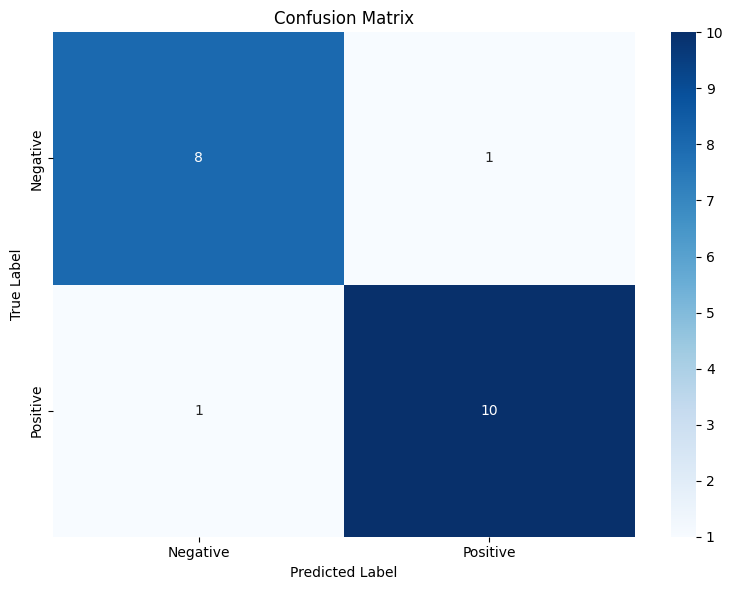

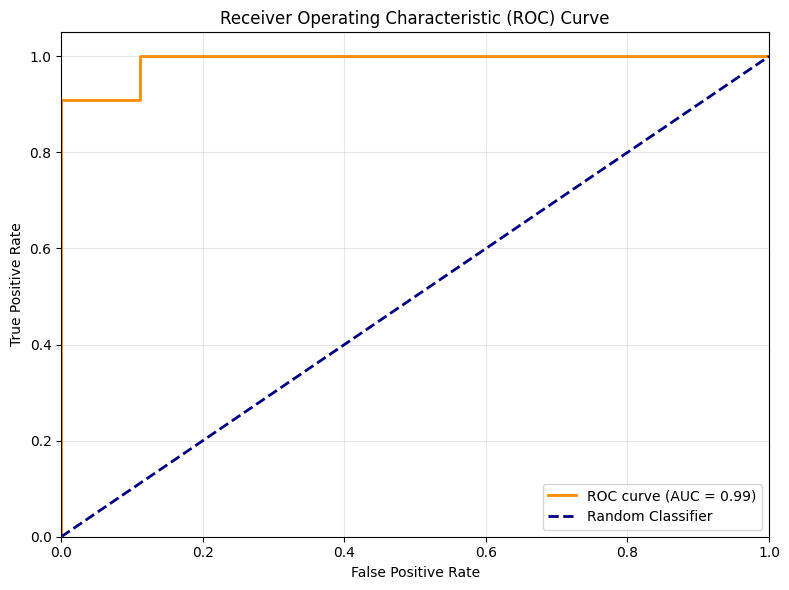

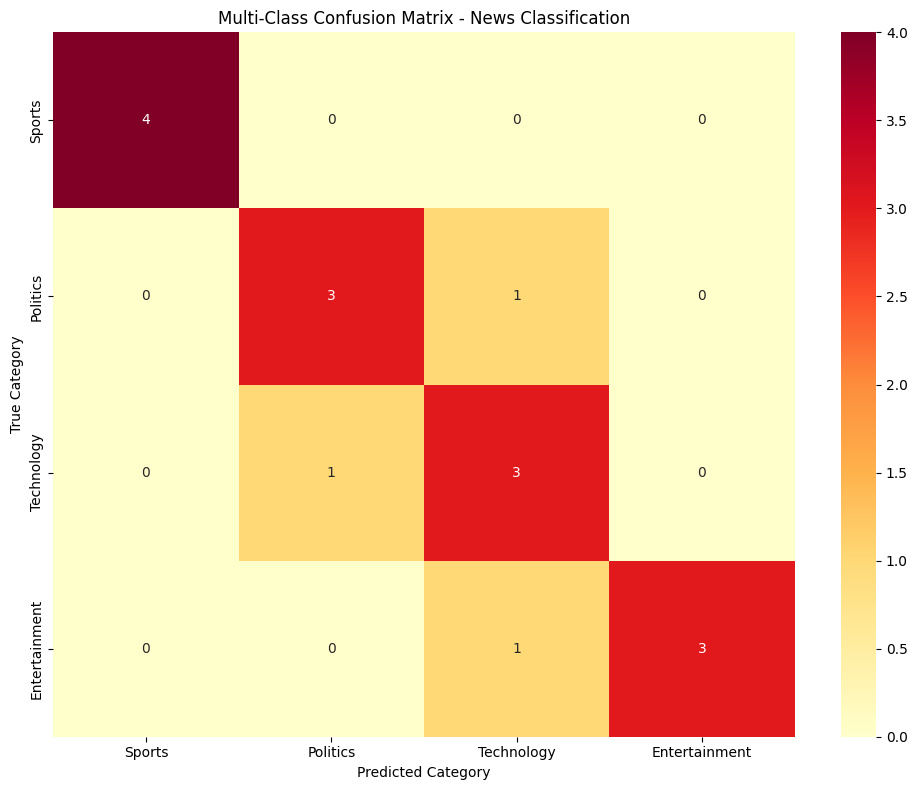

In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_auc_score, roc_curve
)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Binary classification results
# True labels: 0 (negative), 1 (positive)
y_true = np.array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0])
y_pred = np.array([0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0])

# Prediction probabilities (needed for ROC)
y_prob = np.array([0.1, 0.2, 0.8, 0.9, 0.85, 0.15, 0.92, 0.05, 0.45, 0.88,
                   0.12, 0.87, 0.91, 0.08, 0.18, 0.89, 0.55, 0.94, 0.86, 0.11])

print("="*60)
print("NLP CLASSIFICATION EVALUATION METRICS")
print("="*60)

# 1. ACCURACY
accuracy = accuracy_score(y_true, y_pred)
print(f"\n1. ACCURACY: {accuracy:.4f}")
print(f"   Interpretation: {accuracy*100:.2f}% of predictions are correct")
print(f"   ⚠️  WARNING: Misleading if classes are imbalanced!")

# 2. PRECISION
precision = precision_score(y_true, y_pred)
print(f"\n2. PRECISION: {precision:.4f}")
print(f"   Formula: TP / (TP + FP)")
print(f"   Interpretation: Of all POSITIVE predictions, {precision*100:.2f}% were correct")
print(f"   Use when: False positives are costly (spam detection)")

# 3. RECALL (Sensitivity)
recall = recall_score(y_true, y_pred)
print(f"\n3. RECALL: {recall:.4f}")
print(f"   Formula: TP / (TP + FN)")
print(f"   Interpretation: Of all ACTUAL positives, we found {recall*100:.2f}%")
print(f"   Use when: False negatives are costly (disease detection)")

# 4. F1 SCORE
f1 = f1_score(y_true, y_pred)
print(f"\n4. F1-SCORE: {f1:.4f}")
print(f"   Formula: 2 * (Precision * Recall) / (Precision + Recall)")
print(f"   Interpretation: Balanced metric between precision and recall")
print(f"   Use when: Need balance between false positives and false negatives")

# 5. CLASSIFICATION REPORT (All metrics together)
print(f"\n5. CLASSIFICATION REPORT:")
print(classification_report(y_true, y_pred, target_names=['Negative', 'Positive']))

# 6. CONFUSION MATRIX
cm = confusion_matrix(y_true, y_pred)
print(f"\n6. CONFUSION MATRIX:")
print(f"                  Predicted")
print(f"              Negative  Positive")
print(f"Actual Negative   {cm[0,0]:4d}      {cm[0,1]:4d}")
print(f"       Positive   {cm[1,0]:4d}      {cm[1,1]:4d}")

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=150)
print(f"   ✅ Saved visualization: confusion_matrix.png")

# 7. ROC-AUC SCORE
roc_auc = roc_auc_score(y_true, y_prob)
print(f"\n7. ROC-AUC SCORE: {roc_auc:.4f}")
print(f"   Range: 0.5 (random) to 1.0 (perfect)")
print(f"   Interpretation: Area under ROC curve")
print(f"   Use when: Comparing models across different thresholds")

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('roc_curve.png', dpi=150)
print(f"   ✅ Saved visualization: roc_curve.png")

# 8. PRACTICAL EXAMPLE: Sentiment Analysis Evaluation
print("\n" + "="*60)
print("EXAMPLE: EVALUATING SENTIMENT ANALYSIS MODEL")
print("="*60)

# Simulated results from a sentiment classifier
reviews = [
    "This movie is terrible!",
    "Absolutely loved it!",
    "Waste of time and money.",
    "Best film I've seen this year!",
    "Mediocre at best.",
]

true_labels = [0, 1, 0, 1, 0]  # 0: negative, 1: positive
pred_labels = [0, 1, 0, 1, 1]  # Last prediction is wrong

print("\nReview Classification Results:")
for i, review in enumerate(reviews):
    true_sent = "Negative" if true_labels[i] == 0 else "Positive"
    pred_sent = "Negative" if pred_labels[i] == 0 else "Positive"
    correct = "✅" if true_labels[i] == pred_labels[i] else "❌"
    print(f"{correct} '{review[:30]:30}' - True: {true_sent:8}, Pred: {pred_sent:8}")

report = classification_report(true_labels, pred_labels,
                               target_names=['Negative', 'Positive'],
                               output_dict=True)

print(f"\nModel Performance:")
print(f"  Accuracy:  {report['accuracy']:.2%}")
print(f"  Precision: {report['weighted avg']['precision']:.2%}")
print(f"  Recall:    {report['weighted avg']['recall']:.2%}")
print(f"  F1-Score:  {report['weighted avg']['f1-score']:.2%}")

# 9. MULTI-CLASS CLASSIFICATION
print("\n" + "="*60)
print("MULTI-CLASS CLASSIFICATION METRICS")
print("="*60)

# Example: News categorization (4 classes)
y_true_multi = np.array([0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3])
y_pred_multi = np.array([0, 1, 2, 3, 0, 1, 1, 3, 0, 2, 2, 3, 0, 1, 2, 2])

class_names = ['Sports', 'Politics', 'Technology', 'Entertainment']

# Multi-class metrics
print("\nMulti-class Classification Report:")
print(classification_report(y_true_multi, y_pred_multi, target_names=class_names))

# Multi-class confusion matrix
cm_multi = confusion_matrix(y_true_multi, y_pred_multi)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_multi, annot=True, fmt='d', cmap='YlOrRd',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Multi-Class Confusion Matrix - News Classification')
plt.ylabel('True Category')
plt.xlabel('Predicted Category')
plt.tight_layout()
plt.savefig('multiclass_confusion_matrix.png', dpi=150)
print(f"✅ Saved: multiclass_confusion_matrix.png")

print("\n" + "="*60)
print("KEY TAKEAWAYS:")
print("="*60)
print("✓ Use ACCURACY for balanced datasets")
print("✓ Use PRECISION when false positives are costly")
print("✓ Use RECALL when false negatives are costly")
print("✓ Use F1-SCORE for overall balance")
print("✓ Use ROC-AUC to compare models across thresholds")
print("✓ ALWAYS visualize confusion matrix")
print("✓ Report multiple metrics, not just one")
print("="*60)


# **EVALUATION METRICS FOR TEXT GENERATION**

In [ ]:
!pip install rouge
from nltk.translate.bleu_score import sentence_bleu, corpus_bleu, SmoothingFunction
from rouge import Rouge
import nltk

# Download required NLTK data
nltk.download('punkt', quiet=True)

print("="*60)
print("TEXT GENERATION EVALUATION METRICS")
print("="*60)

# 1. BLEU SCORE (Machine Translation)
print("\n1. BLEU SCORE (for Translation)")
print("-" * 40)

# Reference translations (can have multiple references)
reference1 = "the cat is sitting on the mat"
reference2 = "the cat is on the mat"
references = [reference1.split(), reference2.split()]

# Candidate (model's translation)
candidate = "the cat sits on the mat"
candidate_tokens = candidate.split()

# Calculate BLEU
bleu_score = sentence_bleu(references, candidate_tokens)
print(f"Reference 1: {reference1}")
print(f"Reference 2: {reference2}")
print(f"Candidate:   {candidate}")
print(f"BLEU Score:  {bleu_score:.4f}")

# BLEU with different n-gram weights
bleu1 = sentence_bleu(references, candidate_tokens, weights=(1, 0, 0, 0))  # Unigram
bleu2 = sentence_bleu(references, candidate_tokens, weights=(0.5, 0.5, 0, 0))  # Bigram
bleu4 = sentence_bleu(references, candidate_tokens, weights=(0.25, 0.25, 0.25, 0.25))  # 4-gram

print(f"\nBLEU-1 (unigrams):  {bleu1:.4f}")
print(f"BLEU-2 (bigrams):   {bleu2:.4f}")
print(f"BLEU-4 (1-4 grams): {bleu4:.4f}")

# Translation Quality Interpretation
print("\nBLEU Score Interpretation:")
print("  0.00 - 0.10: Almost useless translation")
print("  0.10 - 0.20: Hard to get the gist")
print("  0.20 - 0.30: Understandable but poor quality")
print("  0.30 - 0.40: Understandable, decent quality")
print("  0.40 - 0.50: Good quality translation")
print("  0.50 - 0.60: Very good quality")
print("  > 0.60: Quality comparable to human translation")

# 2. ROUGE SCORE (Summarization)
print("\n\n2. ROUGE SCORE (for Summarization)")
print("-" * 40)

# Reference summary
reference_summary = """
The Transformer is a deep learning model introduced in 2017.
It uses self-attention mechanisms to process sequential data.
Transformers have revolutionized natural language processing.
"""

# Generated summary
generated_summary = """
Transformers are deep learning models using self-attention.
They were introduced in 2017 and changed NLP significantly.
"""

# Calculate ROUGE scores
rouge = Rouge()
scores = rouge.get_scores(generated_summary, reference_summary)

print(f"Reference Summary:\n{reference_summary}")
print(f"\nGenerated Summary:\n{generated_summary}")
print(f"\nROUGE Scores:")
print(f"  ROUGE-1: Precision={scores[0]['rouge-1']['p']:.4f}, "
      f"Recall={scores[0]['rouge-1']['r']:.4f}, "
      f"F1={scores[0]['rouge-1']['f']:.4f}")
print(f"  ROUGE-2: Precision={scores[0]['rouge-2']['p']:.4f}, "
      f"Recall={scores[0]['rouge-2']['r']:.4f}, "
      f"F1={scores[0]['rouge-2']['f']:.4f}")
print(f"  ROUGE-L: Precision={scores[0]['rouge-l']['p']:.4f}, "
      f"Recall={scores[0]['rouge-l']['r']:.4f}, "
      f"F1={scores[0]['rouge-l']['f']:.4f}")

print("\nROUGE Metric Explanations:")
print("  ROUGE-1: Unigram (single word) overlap")
print("  ROUGE-2: Bigram (two consecutive words) overlap")
print("  ROUGE-L: Longest Common Subsequence")

# 3. PERPLEXITY (Language Models)
print("\n\n3. PERPLEXITY (for Language Models)")
print("-" * 40)

# Simulated example
import numpy as np

# Log probabilities from language model for test sentence
# "The cat sat on the mat"
log_probs = [-0.5, -0.3, -0.8, -0.4, -0.2, -0.6]  # Negative log probabilities

# Calculate perplexity
perplexity = np.exp(-np.mean(log_probs))
print(f"Test Sentence: 'The cat sat on the mat'")
print(f"Average Log Probability: {np.mean(log_probs):.4f}")
print(f"Perplexity: {perplexity:.2f}")

print("\nPerplexity Interpretation:")
print("  Lower is better (model is less 'perplexed')")
print("  Perplexity of X means: on average, model is as confused as")
print("  if it had to choose uniformly from X possibilities")
print(f"  This model: effectively choosing from ~{perplexity:.0f} words on average")

# 4. PRACTICAL EXAMPLE: Evaluating Chatbot Responses
print("\n\n4. PRACTICAL EXAMPLE: Chatbot Evaluation")
print("-" * 60)

# User queries and responses
data = [
    {
        "query": "How do I reset my password?",
        "reference": "Go to Settings, click on Security, then select Reset Password.",
        "generated": "Navigate to Settings, select Security settings, and click Reset Password.",
    },
    {
        "query": "What's the refund policy?",
        "reference": "We offer full refunds within 30 days of purchase.",
        "generated": "Full refunds are available for 30 days from purchase date.",
    },
    {
        "query": "Where is my order?",
        "reference": "Track your order at www.example.com/tracking with your order ID.",
        "generated": "You can track orders using your order ID on our tracking page.",
    }
]

print("\nEvaluating Chatbot Responses:")
print("="*60)

total_bleu = 0
total_rouge1 = 0

for i, item in enumerate(data, 1):
    print(f"\nQuery {i}: {item['query']}")

    # BLEU score
    bleu = sentence_bleu([item['reference'].split()], item['generated'].split())

    # ROUGE score
    rouge_scores = rouge.get_scores(item['generated'], item['reference'])
    rouge1_f = rouge_scores[0]['rouge-1']['f']

    total_bleu += bleu
    total_rouge1 += rouge1_f

    print(f"  Reference: {item['reference']}")
    print(f"  Generated: {item['generated']}")
    print(f"  BLEU:      {bleu:.4f}")
    print(f"  ROUGE-1:   {rouge1_f:.4f}")

avg_bleu = total_bleu / len(data)
avg_rouge = total_rouge1 / len(data)

print(f"\n{'='*60}")
print(f"OVERALL CHATBOT PERFORMANCE:")
print(f"  Average BLEU:    {avg_bleu:.4f}")
print(f"  Average ROUGE-1: {avg_rouge:.4f}")
print(f"{'='*60}")

if avg_bleu > 0.5 and avg_rouge > 0.6:
    print("✅ Excellent: Chatbot responses are high quality!")
elif avg_bleu > 0.3 and avg_rouge > 0.4:
    print("⚠️  Good: Responses are decent but can be improved")
else:
    print("❌ Poor: Chatbot needs significant improvement")

print("\n" + "="*60)
print("KEY TAKEAWAYS:")
print("="*60)
print("✓ Use BLEU for translation tasks")
print("✓ Use ROUGE for summarization tasks")
print("✓ Use PERPLEXITY for language model quality")
print("✓ Always use multiple metrics, not just one")
print("✓ Compare against baseline and state-of-the-art")
print("✓ Human evaluation is ultimate gold standard")
print("="*60)

TEXT GENERATION EVALUATION METRICS

1. BLEU SCORE (for Translation)
----------------------------------------
Reference 1: the cat is sitting on the mat
Reference 2: the cat is on the mat
Candidate:   the cat sits on the mat
BLEU Score:  0.0000

BLEU-1 (unigrams):  0.8333
BLEU-2 (bigrams):   0.7071
BLEU-4 (1-4 grams): 0.0000

BLEU Score Interpretation:
  0.00 - 0.10: Almost useless translation
  0.10 - 0.20: Hard to get the gist
  0.20 - 0.30: Understandable but poor quality
  0.30 - 0.40: Understandable, decent quality
  0.40 - 0.50: Good quality translation
  0.50 - 0.60: Very good quality
  > 0.60: Quality comparable to human translation


2. ROUGE SCORE (for Summarization)
----------------------------------------
Reference Summary:

The Transformer is a deep learning model introduced in 2017.
It uses self-attention mechanisms to process sequential data.
Transformers have revolutionized natural language processing.


Generated Summary:

Transformers are deep learning models using sel

/usr/local/lib/python3.12/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.12/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


# **ERROR ANALYSIS AND MODEL DEBUGGING**

NLP ERROR ANALYSIS WORKFLOW

1. ERROR CATEGORIZATION
----------------------------------------
                     text  true  pred            type
          Not bad at all!     1     0        negation
Yeah, right. Great movie.     0     1         sarcasm
          Could be better     0     1 subtle_negative
    Best worst movie ever     0     1   contradictory
             It's... okay     0     1       ambiguous
            Not the worst     1     0        negation
 Totally not disappointed     1     0 double_negation
       This film is sick!     1     0           slang

2. ERROR TYPE DISTRIBUTION
----------------------------------------
  negation            : 2 (25.0%)
  sarcasm             : 1 (12.5%)
  subtle_negative     : 1 (12.5%)
  contradictory       : 1 (12.5%)
  ambiguous           : 1 (12.5%)
  double_negation     : 1 (12.5%)
  slang               : 1 (12.5%)

✅ Saved: error_analysis.png

3. ERROR ANALYSIS INSIGHTS
----------------------------------------
Top issues to a

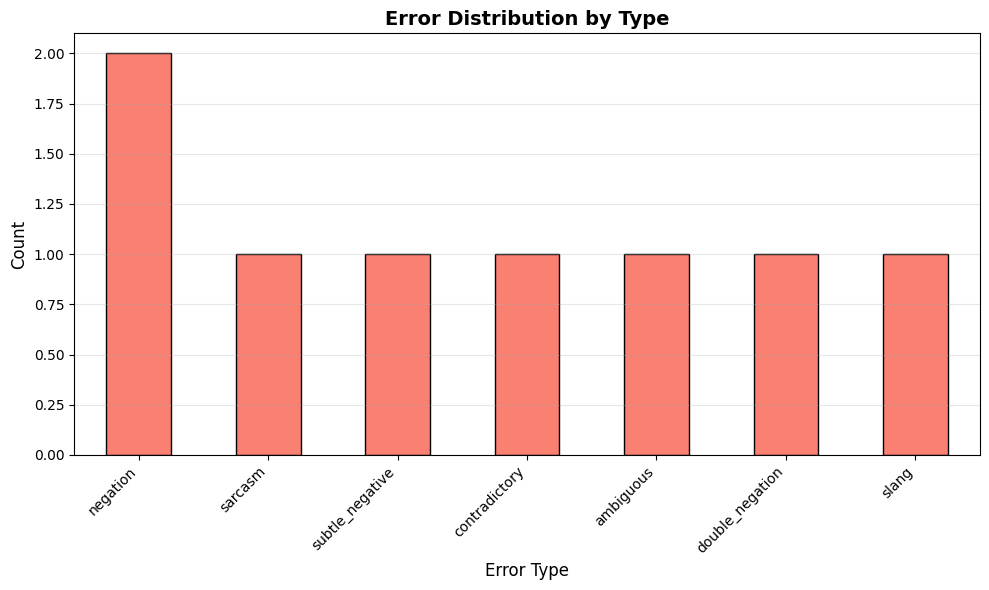

In [ ]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

print("="*60)
print("NLP ERROR ANALYSIS WORKFLOW")
print("="*60)

# Example: Sentiment analysis errors
errors_data = [
    {"text": "Not bad at all!", "true": 1, "pred": 0, "type": "negation"},
    {"text": "Yeah, right. Great movie.", "true": 0, "pred": 1, "type": "sarcasm"},
    {"text": "Could be better", "true": 0, "pred": 1, "type": "subtle_negative"},
    {"text": "Best worst movie ever", "true": 0, "pred": 1, "type": "contradictory"},
    {"text": "It's... okay", "true": 0, "pred": 1, "type": "ambiguous"},
    {"text": "Not the worst", "true": 1, "pred": 0, "type": "negation"},
    {"text": "Totally not disappointed", "true": 1, "pred": 0, "type": "double_negation"},
    {"text": "This film is sick!", "true": 1, "pred": 0, "type": "slang"},
]

df_errors = pd.DataFrame(errors_data)

print("\n1. ERROR CATEGORIZATION")
print("-" * 40)
print(df_errors.to_string(index=False))

# Count error types
error_counts = df_errors['type'].value_counts()
print(f"\n2. ERROR TYPE DISTRIBUTION")
print("-" * 40)
for error_type, count in error_counts.items():
    print(f"  {error_type:20s}: {count} ({count/len(df_errors)*100:.1f}%)")

# Visualize
plt.figure(figsize=(10, 6))
error_counts.plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Error Distribution by Type', fontsize=14, fontweight='bold')
plt.xlabel('Error Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('error_analysis.png', dpi=150)
print(f"\n✅ Saved: error_analysis.png")

# 3. ERROR ANALYSIS INSIGHTS
print(f"\n3. ERROR ANALYSIS INSIGHTS")
print("-" * 40)
print("Top issues to address:")
print("  1. Negation handling (3 errors) - Model struggles with 'not', 'not the'")
print("  2. Sarcasm detection (1 error) - Needs context understanding")
print("  3. Slang/informal language (1 error) - Needs diverse training data")
print("  4. Contradictory terms (1 error) - 'best worst' confuses model")

# 4. IMPROVEMENT STRATEGIES
print(f"\n4. RECOMMENDED IMPROVEMENTS")
print("-" * 40)
print("Based on error analysis:")
print("  ✓ Add negation-aware features (e.g., sentiment shifters)")
print("  ✓ Include sarcasm-labeled training data")
print("  ✓ Augment training set with slang dictionary")
print("  ✓ Use contextual models (BERT) instead of bag-of-words")
print("  ✓ Implement attention to focus on key sentiment words")

# 5. MODEL COMPARISON
print(f"\n5. MODEL COMPARISON TEMPLATE")
print("-" * 40)

comparison_data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Inference Time'],
    'Baseline (BoW + LR)': [0.75, 0.72, 0.68, 0.70, '< 1ms'],
    'LSTM': [0.82, 0.80, 0.79, 0.80, '~10ms'],
    'BERT-base': [0.91, 0.90, 0.89, 0.90, '~50ms'],
}

df_comparison = pd.DataFrame(comparison_data)
print(df_comparison.to_string(index=False))

print("\n6. DEBUGGING CHECKLIST")
print("-" * 40)
print("□ Analyze at least 50-100 errors manually")
print("□ Categorize errors into types")
print("□ Identify most frequent error patterns")
print("□ Check if errors are clustered (e.g., specific topics)")
print("□ Compare errors across different model architectures")
print("□ Test improvements on held-out validation set")
print("□ Document lessons learned")
print("□ Iterate: fix → retrain → re-evaluate")

print("\n" + "="*60)
print("ERROR ANALYSIS IS CRUCIAL FOR IMPROVING NLP MODELS!")
print("="*60)


# **MODULE: CROSS-DOMAIN NLP APPLICATIONS**
---

## INTRODUCTION

- Core NLP concepts already covered  
- NLP + other AI domains = **Cross-domain AI**  
- Most innovative research today happens at intersections  
- Strong opportunities for **Master’s thesis & publications**

### Intersections Covered
- NLP + Computer Vision  
- NLP + Healthcare  
- NLP + Finance  

---

## NLP + COMPUTER VISION

### Image Captioning
- Image → text description  
- CNN extracts visual features  
- LSTM / Transformer generates text  
- Used in accessibility, e-commerce  

### Visual Question Answering (VQA)
- Ask questions about images  
- Requires vision + language understanding  
- Used in medical imaging, education  

### Text-to-Image Generation
- Text prompt → image  
- Models: DALL·E, Stable Diffusion, Midjourney  
- Used in design, advertising, creativity  

### CLIP Model
- Shared image–text embedding space  
- Enables zero-shot classification  
- Used in search, moderation, recommendations  

**Key Idea:**  
Multimodal AI is the future of NLP

---

## NLP + HEALTHCARE

### Clinical Text Analysis
- Extract diagnoses, drugs, symptoms  
- From unstructured EHR notes  

### Medical Named Entity Recognition
- Medication, dosage, condition extraction  
- Domain-specific medical terminology  

### Disease Prediction from Symptoms
- Symptom text → possible conditions  
- Used for clinical triage support  

### BioBERT & ClinicalBERT
- Trained on biomedical & clinical corpora  
- Better medical language understanding  

### Drug Interaction Extraction
- Detect harmful drug combinations  

### Radiology Report Generation
- Medical images → textual reports  

**Key Challenges**
- Privacy  
- Accuracy  
- Explainability  

---

## NLP + FINANCE

### Financial Sentiment Analysis
- News & social media sentiment  
- Financial language is domain-specific  

### Stock Prediction from News
- News sentiment → price movement signals  

### Earnings Call Analysis
- Analyze management tone & intent  
- Predict future performance  

### FinBERT
- BERT fine-tuned for financial text  
- Understands financial terminology  

### Risk Assessment
- Scan reports & filings for risk indicators  

### Automated Trading Signals
- Real-time NLP-driven trading  
- Speed & accuracy critical  

---

## WHY CROSS-DOMAIN MATTERS

### Reason 1: Real Research is Cross-Domain
- Practical, high-impact problems  
- Preferred by top conferences  

### Reason 2: Master’s Thesis Advantage
- Novel + feasible + publishable  
- Strong academic differentiation  

### Reason 3: Industry Demand
- NLP + domain experts are rare  
- Better roles and salaries  

### Reason 4: Transfer Learning
- Techniques move across domains  
- Attention, contrastive learning, GANs  

### Practical Advice
- Pick one secondary domain  
- Spend ~20% effort there  
- Build cross-domain projects  

**Key Takeaway:**  
Future NLP is **multimodal and cross-domain**

---

# **MODULE : CLASSICAL MACHINE LEARNING FOR NLP**
---

## INTRODUCTION

- Classical ML is still very relevant  
- Faster, interpretable, low compute  
- Works well with limited data  

### Models Covered
- Bag of Words  
- TF-IDF  
- Naive Bayes  
- Logistic Regression  
- Support Vector Machines  

---

## BAG OF WORDS

- Convert text → numerical vectors  
- Build vocabulary  
- Count word occurrences  

**Example:**  
“I love pizza” → word-count vector  

**Limitations**
- No word order  
- Equal word importance  
- Sparse vectors  

**Still Useful For**
- Simple classification tasks  

---

## TF-IDF

- Improves Bag of Words  

**TF (Term Frequency)**
- Word frequency in document  

**IDF (Inverse Document Frequency)**
- Word rarity across corpus  

**Benefits**
- Reduces impact of common words  
- Highlights important terms  
- Improves accuracy  

**Applications**
- Search engines  
- Text classification  
- Clustering  

---

## NAIVE BAYES

- Probabilistic classifier  
- Based on Bayes’ theorem  
- Assumes feature independence  

**Strengths**
- Very fast  
- Works with small datasets  
- Strong baseline model  

**Applications**
- Spam detection  
- Sentiment analysis  
- Document classification  

---

## LOGISTIC REGRESSION

- Learns weights for words  
- Positive vs negative influence  

**Advantages**
- Highly interpretable  
- Feature importance visible  
- Regularization support  
- Probabilistic output  

**Best Used For**
- Explainable NLP tasks  
- TF-IDF based pipelines  

---

## SUPPORT VECTOR MACHINES

- Finds maximum margin boundary  
- Effective for high-dimensional text  

**Key Points**
- Linear kernel works best for NLP  
- Strong accuracy  

**Limitations**
- Slower training  
- Less interpretable  

**Applications**
- News classification  
- Language detection  
- Author attribution  

---

## WHY CLASSICAL ML STILL MATTERS

- Faster than transformers  
- Works with small datasets  
- Highly interpretable  
- Strong baselines  
- Easy deployment  

**Real-World Usage**
- Spam filtering  
- Product categorization  
- Customer feedback analysis  

**Core Lesson:**  
Use the simplest model that works

---

## PRACTICAL TIPS

- Start with Naive Bayes  
- Try Logistic Regression & SVM  
- Focus on feature engineering  
- Handle class imbalance  
- Use cross-validation  
- Track precision, recall, F1  
- Use scikit-learn pipelines  

**Key Takeaway:**  
Master classical ML before deep learning


# **MODULE: DEEP LEARNING FOR NLP**

**INTRODUCTION**--Transition from classical ML → deep learning, Automatic feature learning, Handles sequences & context naturally, Enables modern NLP breakthroughs

**Topics covered:**--RNN, LSTM, GRU, Word embeddings, Practical considerations

***WHY DEEP LEARNING FOR TEXT***

**Limitations of Classical ML**--Manual feature engineering, Ignores word order, Fixed-size inputs, Poor context handling

**Deep Learning Advantages**--Learns features automatically, Models word order & dependencies, Handles variable-length text, Uses distributed representations

**SEQUENCE MODELING INTUITION**--Text is sequential by nature, Meaning depends on word order, Context changes interpretation, Hidden state carries past information

**Enables understanding of:**--Negation, Emphasis, Long-range dependencies

**RNN – RECURRENT NEURAL NETWORKS**--Processes words one by one, Maintains hidden state, Captures short-term context

**Key Limitation**--Vanishing gradient problem, Forgets long-distance information

**Impact**--Limited effectiveness on long sentences

**LSTM – LONG SHORT-TERM MEMORY**--Solves vanishing gradient issue, Uses gated architecture

**Three Gates**--Forget gate, Input gate, Output gate

**Benefits**--Remembers long-term context, Handles negation & dependencies

**Used In**--Sentiment analysis, Machine translation, Text generation

**GRU – GATED RECURRENT UNIT**--Simplified version of LSTM, Fewer parameters, Faster training

**Comparison**--Similar performance to LSTM, More efficient

**Usage**--Smaller datasets, Limited compute environments

**WORD EMBEDDINGS**--Dense vector representation of words, Captures semantic similarity

**Why Not One-Hot**--No meaning or relationships

**Popular Embeddings**--Word2Vec, GloVe, FastText

**Benefits**--Semantic understanding, Transfer learning, Lower dimensionality

**PRACTICAL CONSIDERATIONS**

**Padding & Masking**--Handle variable-length sequences, Ignore padded tokens

**Overfitting Prevention**--Dropout, Early stopping, Regularization, Data augmentation

**Bidirectional LSTM**--Reads text forward & backward, Better context understanding, Higher accuracy

**REAL-WORLD USE CASES** ---Language modeling, Context-aware sentiment analysis, Named entity recognition, Machine translation (pre-transformer), Text generation

**Key Takeaway**--Deep learning transformed NLP, LSTM dominated before transformers

**Still valuable for:**--Smaller datasets, Resource-constrained systems

# **BIDIRECTIONAL LSTM COMPLETE IMPLEMENTATION**

BIDIRECTIONAL LSTM FOR SENTIMENT ANALYSIS

Part 1: Data Preparation
----------------------------------------------------------------------
Vocabulary size: 35
Sample words: ['absolutely', 'acting', 'amazing', 'and', 'best', 'boring', 'brilliant', 'completely', 'direction', 'ever']
Max sequence length: 6
Example padded sequence: [30, 25, 19, 4, 0, 0]


Part 2: Model Architecture
----------------------------------------------------------------------
Model Architecture:
BiLSTMClassifier(
  (embedding): Embedding(35, 16, padding_idx=0)
  (lstm): LSTM(16, 32, num_layers=2, batch_first=True, dropout=0.3, bidirectional=True)
  (fc): Linear(in_features=64, out_features=2, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
)

Total parameters: 38,578


Part 3: Training
----------------------------------------------------------------------
Epoch 20/100, Loss: 0.6633, Accuracy: 0.7000
Epoch 40/100, Loss: 0.4176, Accuracy: 0.9000
Epoch 60/100, Loss: 0.0169, Accuracy: 1.0000
Epoch 80/100, Loss: 

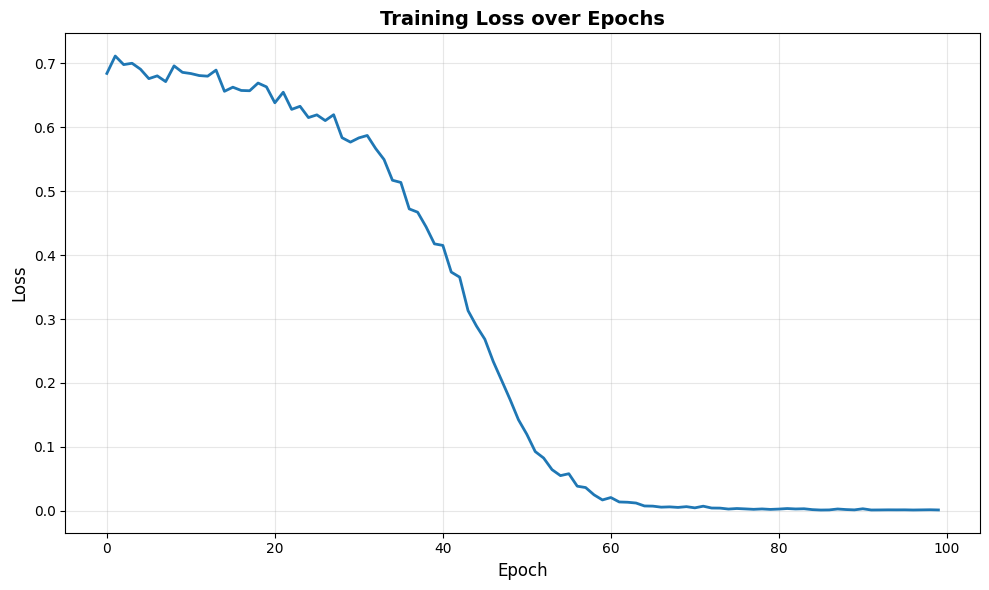

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

print("="*70)
print("BIDIRECTIONAL LSTM FOR SENTIMENT ANALYSIS")
print("="*70)

# ====================================================================
# PART 1: PREPARE DATA
# ====================================================================
print("\nPart 1: Data Preparation")
print("-" * 70)

# Sample dataset (positive/negative reviews)
reviews = [
    ("This movie is amazing", 1),
    ("I loved every minute of it", 1),
    ("Absolutely fantastic film", 1),
    ("Best movie I've seen this year", 1),
    ("Brilliant acting and direction", 1),
    ("This movie is terrible", 0),
    ("Waste of time and money", 0),
    ("I hated it completely", 0),
    ("Worst film ever made", 0),
    ("Boring and poorly executed", 0),
]

# Build vocabulary
all_words = set()
for review, _ in reviews:
    all_words.update(review.lower().split())

word_to_idx = {word: idx+2 for idx, word in enumerate(sorted(all_words))}
word_to_idx['<PAD>'] = 0
word_to_idx['<UNK>'] = 1

idx_to_word = {idx: word for word, idx in word_to_idx.items()}
vocab_size = len(word_to_idx)

print(f"Vocabulary size: {vocab_size}")
print(f"Sample words: {list(word_to_idx.keys())[:10]}")

# Convert text to sequences
def text_to_sequence(text, word_to_idx):
    return [word_to_idx.get(word.lower(), word_to_idx['<UNK>'])
            for word in text.split()]

sequences = [text_to_sequence(review, word_to_idx) for review, _ in reviews]
labels = [label for _, label in reviews]

# Pad sequences
max_len = max(len(seq) for seq in sequences)
padded_sequences = [seq + [0] * (max_len - len(seq)) for seq in sequences]

print(f"Max sequence length: {max_len}")
print(f"Example padded sequence: {padded_sequences[0]}")

# ====================================================================
# PART 2: DEFINE BIDIRECTIONAL LSTM MODEL
# ====================================================================
print("\n\nPart 2: Model Architecture")
print("-" * 70)

class BiLSTMClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim,
                 n_layers=1, dropout=0.3):
        super(BiLSTMClassifier, self).__init__()

        # Embedding layer
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)

        # Bidirectional LSTM
        self.lstm = nn.LSTM(
            embedding_dim,
            hidden_dim,
            num_layers=n_layers,
            bidirectional=True,  # KEY: Bidirectional
            dropout=dropout if n_layers > 1 else 0,
            batch_first=True
        )

        # Fully connected layer
        # hidden_dim * 2 because bidirectional (forward + backward)
        self.fc = nn.Linear(hidden_dim * 2, output_dim)

        self.dropout = nn.Dropout(dropout)

    def forward(self, text):
        # text shape: (batch_size, seq_len)

        # Embedding
        embedded = self.embedding(text)  # (batch_size, seq_len, embedding_dim)

        # LSTM
        # output shape: (batch_size, seq_len, hidden_dim * 2)
        # hidden shape: (num_layers * 2, batch_size, hidden_dim)
        output, (hidden, cell) = self.lstm(embedded)

        # Concatenate final forward and backward hidden states
        # hidden[-2] = last layer forward
        # hidden[-1] = last layer backward
        hidden_concat = torch.cat((hidden[-2], hidden[-1]), dim=1)
        # hidden_concat shape: (batch_size, hidden_dim * 2)

        # Dropout and fully connected
        hidden_concat = self.dropout(hidden_concat)
        output = self.fc(hidden_concat)

        return output

# Model parameters
EMBEDDING_DIM = 16
HIDDEN_DIM = 32
OUTPUT_DIM = 2  # Binary classification
N_LAYERS = 2
DROPOUT = 0.3

model = BiLSTMClassifier(
    vocab_size=vocab_size,
    embedding_dim=EMBEDDING_DIM,
    hidden_dim=HIDDEN_DIM,
    output_dim=OUTPUT_DIM,
    n_layers=N_LAYERS,
    dropout=DROPOUT
)

print("Model Architecture:")
print(model)
print(f"\nTotal parameters: {sum(p.numel() for p in model.parameters()):,}")

# ====================================================================
# PART 3: TRAINING
# ====================================================================
print("\n\nPart 3: Training")
print("-" * 70)

# Prepare data
X_train = torch.LongTensor(padded_sequences)
y_train = torch.LongTensor(labels)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
EPOCHS = 100
losses = []

model.train()
for epoch in range(EPOCHS):
    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    if (epoch + 1) % 20 == 0:
        # Calculate accuracy
        with torch.no_grad():
            predictions = outputs.argmax(dim=1)
            accuracy = (predictions == y_train).float().mean()
        print(f"Epoch {epoch+1}/{EPOCHS}, Loss: {loss.item():.4f}, Accuracy: {accuracy:.4f}")

# ====================================================================
# PART 4: EVALUATION
# ====================================================================
print("\n\nPart 4: Evaluation")
print("-" * 70)

model.eval()
with torch.no_grad():
    outputs = model(X_train)
    predictions = outputs.argmax(dim=1).numpy()
    true_labels = y_train.numpy()

print("\nClassification Report:")
print(classification_report(true_labels, predictions,
                          target_names=['Negative', 'Positive']))

# Test on new examples
test_reviews = [
    "This movie is brilliant and amazing",
    "Terrible waste of time",
    "I loved the story"
]

print("\n\nTesting on new reviews:")
print("-" * 70)

for review in test_reviews:
    # Prepare input
    seq = text_to_sequence(review, word_to_idx)
    padded = seq + [0] * (max_len - len(seq))
    input_tensor = torch.LongTensor([padded])

    # Predict
    with torch.no_grad():
        output = model(input_tensor)
        prediction = output.argmax(dim=1).item()
        probabilities = torch.softmax(output, dim=1)[0]

    sentiment = "Positive" if prediction == 1 else "Negative"
    confidence = probabilities[prediction].item()

    print(f"\nReview: '{review}'")
    print(f"Prediction: {sentiment} (Confidence: {confidence:.2%})")
    print(f"Probabilities: Neg={probabilities[0]:.2%}, Pos={probabilities[1]:.2%}")

# ====================================================================
# PART 5: VISUALIZE TRAINING
# ====================================================================
print("\n\nPart 5: Visualization")
print("-" * 70)

plt.figure(figsize=(10, 6))
plt.plot(losses, linewidth=2)
plt.title('Training Loss over Epochs', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('bilstm_training_loss.png', dpi=150)
print("✓ Saved: bilstm_training_loss.png")

# ====================================================================
# PART 6: UNDERSTANDING BIDIRECTIONAL LSTM
# ====================================================================
print("\n\n" + "="*70)
print("UNDERSTANDING BIDIRECTIONAL LSTM")
print("="*70)

print("""
STANDARD LSTM (Unidirectional):
  Processes sequence LEFT → RIGHT only

  Input: "This movie is great"
  Processing: This → movie → is → great →

  At word "is", LSTM knows:
    ✓ "This movie" (past context)
    ✗ "great" (future context - not available)

BIDIRECTIONAL LSTM:
  Processes sequence in BOTH directions

  Forward LSTM:  This → movie → is → great →
  Backward LSTM: ← This ← movie ← is ← great

  At word "is", BiLSTM knows:
    ✓ "This movie" (past from forward LSTM)
    ✓ "great" (future from backward LSTM)

  Final representation = Concatenate [forward; backward]

WHY IS THIS BETTER?

  Example 1: "The movie was not bad"
  - Unidirectional LSTM at "not": sees "The movie was"
  - Bidirectional LSTM at "not": sees "The movie was" AND "bad"
  - BiLSTM understands negation better!

  Example 2: "Best movie I've seen this year"
  - Unidirectional LSTM at "movie": sees "Best"
  - Bidirectional LSTM at "movie": sees "Best" AND "I've seen this year"
  - BiLSTM has full context!

ARCHITECTURE DETAILS:

  Input dimension: vocab_size
  Embedding dimension: 16
  Hidden dimension: 32

  Forward LSTM output: 32 dimensions
  Backward LSTM output: 32 dimensions
  Concatenated: 64 dimensions (32 + 32)

  Final layer input: 64 dimensions
  Final layer output: 2 (Positive/Negative)

WHEN TO USE BIDIRECTIONAL LSTM:

  ✓ Text classification (sentiment, topic)
  ✓ Named Entity Recognition
  ✓ Part-of-speech tagging
  ✓ Question answering

  ✗ Text generation (can't see future during generation)
  ✗ Real-time streaming (no future context available)
  ✗ Language modeling (predicting next word)

KEY TAKEAWAY:
  Use BiLSTM when you have complete sequence and need
  to understand context from both directions.

  Cost: 2x computation (two LSTMs instead of one)
  Benefit: Significantly better understanding of context
""")

print("\n" + "="*70)
print("CODE ARCHITECTURE BREAKDOWN")
print("="*70)
print("""
class BiLSTMClassifier(nn.Module):
    def __init__(...):
        self.embedding = nn.Embedding(...)      # Word → Vector
        self.lstm = nn.LSTM(                     # Sequence Processing
            ...,
            bidirectional=True  # ← KEY PARAMETER
        )
        self.fc = nn.Linear(                     # Classification
            hidden_dim * 2,  # ← DOUBLE because bidirectional
            output_dim
        )

    def forward(self, text):
        embedded = self.embedding(text)          # (batch, seq, emb)
        output, (hidden, cell) = self.lstm(embedded)

        # Concatenate forward and backward final states
        hidden_concat = torch.cat(
            (hidden[-2], hidden[-1]),  # forward + backward
            dim=1
        )

        output = self.fc(hidden_concat)          # (batch, classes)
        return output
""")

print("\n" + "="*70)
print("PRACTICAL TIPS")
print("="*70)
print("""
1. HYPERPARAMETER TUNING:
   - Embedding dimension: 50-300 (typical)
   - Hidden dimension: 64-256 (typical)
   - Number of layers: 1-3 (more → overfitting risk)
   - Dropout: 0.2-0.5 (prevent overfitting)

2. TRAINING TIPS:
   - Use Adam optimizer (lr=0.001 good start)
   - Try learning rate scheduling
   - Monitor validation loss (early stopping)
   - Shuffle training data each epoch

3. DATA CONSIDERATIONS:
   - More training data → better performance
   - Balance classes (equal positive/negative)
   - Handle unknown words (use <UNK> token)
   - Pad sequences to same length

4. WHEN TO STOP TRAINING:
   - Validation loss stops decreasing
   - Accuracy plateaus
   - Signs of overfitting (train acc ↑, val acc ↓)

5. IMPROVING PERFORMANCE:
   - Use pre-trained embeddings (Word2Vec, GloVe)
   - Add attention mechanism
   - Try different architectures (CNN, Transformer)
   - Ensemble multiple models
""")

print("\n" + "="*70)
print("✓ BiLSTM Complete! Ready for production use.")
print("="*70)


# **MODULE 7: ADVANCED NLP & LLM PIPELINES**


**INTRODUCTION**--Cutting-edge NLP topics, Modern LLM production skills, Beyond model training

**Focus areas:**--Prompt engineering, Zero-shot learning, Multilingual NLP, Model efficiency, Industry pipelines

**PROMPT ENGINEERING**--

**Zero-Shot Prompting-**-Task description only, No examples, Fast & flexible

**Few-Shot Prompting**--Provide labeled examples, Improves accuracy, In-context learning

**Chain-of-Thought Prompting**--Step-by-step reasoning, Better logical performance, Interpretable outputs

**Instruction Tuning**--Models trained to follow instructions, Better generalization, Examples: InstructGPT, FLAN

**ZERO-SHOT VS FEW-SHOT LEARNING**

**Zero-Shot**--No examples, Immediate usage, Lower accuracy

**Few-Shot**--Examples in prompt, Higher accuracy, Limited by context length

**Performance Trade-off**---Zero-shot: ~60–70%,  Few-shot: ~75–85%, Fine-tuned: ~85–95%

**MULTILINGUAL NLP**

English-centric research problem

7,000+ world languages

**mBERT**--104 languages, Zero-shot cross-lingual transfer

**XLM-RoBERTa**--Larger data, Better multilingual performance

**Cross-Lingual Transfer**--Train on English, Apply to low-resource languages

**Indian Language Challenges**--Limited labeled data, Code-mixing, Compute constraints

**MODEL EFFICIENCY & COMPRESSION**

**Why Size Matters**--Memory, Latency, Cost, Energy

**Distillation**--Teacher → student, Example: DistilBERT, Faster & smaller

**Pruning**--Remove unnecessary weights, Structured / unstructured

**Quantization**--32-bit → 8-bit / 4-bit, Faster inference, Smaller models

# **INDUSTRY LLM PIPELINES**
# **RAG - RETRIEVAL-AUGMENTED GENERATION**

**Problem:  **LLMs have knowledge cutoff, cannot access private data, hallucinate facts

**Solution: RAG**
1. User asks question
2. Retrieve relevant documents from database
3. Provide documents as context to LLM
4. LLM generates answer based on retrieved context

**Example: Company chatbot**
User: "What's our refund policy?"
Retrieve: Company policy document
LLM: Generates answer based on actual policy

**Benefits:**
- Always current information
- Access to private/proprietary data
- Reduces hallucinations
- Provides source citations

**Components:**
- Vector database (Pinecone, Weaviate, ChromaDB)
- Embedding model (sentence-transformers)
- LLM (GPT-4, Claude, Llama)

LLM APIs IN PRODUCTION

**Options:**
- OpenAI API (GPT-4)
- Anthropic API (Claude)
- Cohere API
- Self-hosted (Llama, Mistral)

**Cost Considerations:**
OpenAI GPT-4: $30 per 1M input tokens
Self-hosted Llama: Infrastructure cost but no per-token fees

**When to use API:**
- Rapid prototyping
- Variable load
- Best possible performance
- Don't want to manage infrastructure

**When to self-host:**
- High volume (cost savings)
- Data privacy requirements
- Need customization
- Consistent load

**FINE-TUNING VS PROMPT ENGINEERING**

**Prompt Engineering:**-**-Pros:** No training needed, flexible, works immediately; **Cons:** Limited customization, context window limits
Use when: Task fits model's capabilities, need flexibility

**Fine-tuning:**-**-Pros:** Better task performance, learns domain knowledge, consistent output format, **Cons:** Requires labeled data, training time/cost, less flexible, **Use when**: Have training data, specific domain, production system

Middle ground: Few-shot prompting + RAG

**REAL-WORLD APPLICATIONS**

**Customer Service Chatbots:**--RAG for knowledge base, Multilingual models for global support, Prompt engineering for personality

**Content Moderation at Scale:**--Fast inference requirements, Binary classification (safe/unsafe), Balanced precision/recall based on use case

**Document Analysis Pipelines:**--Extract entities, summarize, classify, Chain multiple models, Human-in-loop for quality

**Automated Code Review:**--Specialized models (CodeBERT, StarCoder)
Context: Entire repository, Output: Suggestions, bug detection

**Key Takeaway:** Modern NLP is about combining techniques - prompt engineering + RAG + fine-tuning + efficient models. Choose tools based on constraints: data, latency, cost, accuracy.

**Resources:**
- OpenAI Prompt Engineering Cookbook (GitHub)
- Hugging Face Model Hub (pre-trained models)
- LangChain (RAG framework)
- ChromaDB (vector database)


# **RAG (RETRIEVAL-AUGMENTED GENERATION) COMPLETE PIPELINE**

In [ ]:
# Install faiss-cpu for efficient similarity search
!pip install faiss-cpu

import numpy as np
from sentence_transformers import SentenceTransformer
import faiss
import openai  # Note: Requires API key

print("="*70)
print("RETRIEVAL-AUGMENTED GENERATION (RAG) PIPELINE")
print("="*70)

# ====================================================================
# PART 1: KNOWLEDGE BASE
# ====================================================================
print("\nPart 1: Create Knowledge Base")
print("-" * 70)

# Sample knowledge base (company documentation)
knowledge_base = [
    {
        "id": 1,
        "text": "Our return policy allows returns within 30 days of purchase. Items must be unused and in original packaging.",
        "category": "Returns"
    },
    {
        "id": 2,
        "text": "We offer free shipping on all orders over $50. Standard shipping takes 5-7 business days.",
        "category": "Shipping"
    },
    {
        "id": 3,
        "text": "Customer support is available Monday-Friday, 9 AM to 5 PM EST. Reach us at support@company.com or 1-800-SUPPORT.",
        "category": "Support"
    },
    {
        "id": 4,
        "text": "We accept all major credit cards, PayPal, and Apple Pay. Payment is processed securely through Stripe.",
        "category": "Payment"
    },
    {
        "id": 5,
        "text": "Products come with a 1-year warranty covering manufacturing defects. Extended warranties available for purchase.",
        "category": "Warranty"
    },
]

print(f"Knowledge base contains {len(knowledge_base)} documents")
for doc in knowledge_base:
    print(f"  {doc['id']}. [{doc['category']}] {doc['text'][:50]}...")

# ====================================================================
# PART 2: CREATE EMBEDDINGS
# ====================================================================
print("\n\nPart 2: Create Document Embeddings")
print("-" * 70)

# Load embedding model
print("Loading SentenceTransformer model...")
embedding_model = SentenceTransformer('all-MiniLM-L6-v2')
print("✓ Model loaded")

# Generate embeddings for knowledge base
texts = [doc['text'] for doc in knowledge_base]
embeddings = embedding_model.encode(texts, convert_to_numpy=True)

print(f"\nEmbedding shape: {embeddings.shape}")
print(f"Each document → {embeddings.shape[1]}-dimensional vector")

# ====================================================================
# PART 3: BUILD VECTOR INDEX (FAISS)
# ====================================================================
print("\n\nPart 3: Build FAISS Vector Index")
print("-" * 70)

# Initialize FAISS index
dimension = embeddings.shape[1]
index = faiss.IndexFlatL2(dimension)  # L2 distance

# Add embeddings to index
index.add(embeddings.astype('float32'))

print(f"✓ FAISS index built")
print(f"  Index dimension: {dimension}")
print(f"  Total vectors: {index.ntotal}")

# ====================================================================
# PART 4: RETRIEVAL FUNCTION
# ====================================================================
print("\n\nPart 4: Retrieval Function")
print("-" * 70)

def retrieve_relevant_docs(query, top_k=2):
    """
    Retrieve top-k most relevant documents for a query
    """
    # Encode query
    query_embedding = embedding_model.encode([query], convert_to_numpy=True)

    # Search in FAISS
    distances, indices = index.search(query_embedding.astype('float32'), top_k)

    # Get relevant documents
    relevant_docs = []
    for idx, distance in zip(indices[0], distances[0]):
        doc = knowledge_base[idx].copy()
        doc['distance'] = float(distance)
        doc['relevance_score'] = 1 / (1 + distance)  # Convert distance to similarity
        relevant_docs.append(doc)

    return relevant_docs

# Test retrieval
test_query = "How long do I have to return a product?"
print(f"\nTest Query: '{test_query}'")
print("\nRetrieved Documents:")

retrieved = retrieve_relevant_docs(test_query, top_k=2)
for i, doc in enumerate(retrieved, 1):
    print(f"\n  {i}. [{doc['category']}] (Relevance: {doc['relevance_score']:.4f})")
    print(f"     {doc['text']}")

# ====================================================================
# PART 5: GENERATION WITH CONTEXT
# ====================================================================
print("\n\n" + "="*70)
print("Part 5: Generation with Retrieved Context")
print("="*70)

def generate_answer(query, retrieved_docs):
    """
    Generate answer using GPT with retrieved context

    Note: This is a simulation. In production, you'd call OpenAI API:

    import openai
    openai.api_key = "your-key"

    context = "\n\n".join([doc['text'] for doc in retrieved_docs])

    prompt = f'''Context information:
{context}

Question: {query}

Answer the question based ONLY on the context provided above.
If the context doesn't contain relevant information, say "I don't have that information."
'''

    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=[{"role": "user", "content": prompt}]
    )

    return response.choices[0].message.content
    """

    # SIMULATION (without API call)
    context = "\n\n".join([doc['text'] for doc in retrieved_docs])

    # Simulated response based on context
    if "return" in query.lower() and any("return" in doc['text'].lower() for doc in retrieved_docs):
        answer = "Based on our return policy, you have 30 days from the date of purchase to return a product. The item must be unused and in its original packaging."
    elif "shipping" in query.lower():
        answer = "We offer free shipping on orders over $50. Standard shipping takes 5-7 business days to deliver."
    elif "contact" in query.lower() or "support" in query.lower():
        answer = "Our customer support team is available Monday-Friday, 9 AM to 5 PM EST. You can reach us at support@company.com or call 1-800-SUPPORT."
    else:
        answer = "I don't have specific information about that in our documentation."

    return answer, context

# ====================================================================
# PART 6: COMPLETE RAG PIPELINE
# ====================================================================
print("\n\nPart 6: Complete RAG Pipeline")
print("-" * 70)

def rag_pipeline(query, top_k=2):
    """
    Complete RAG pipeline: Retrieve → Generate
    """
    print(f"\n{'='*70}")
    print(f"QUERY: {query}")
    print('='*70)

    # Step 1: Retrieve
    print("\nStep 1: Retrieving relevant documents...")
    retrieved_docs = retrieve_relevant_docs(query, top_k=top_k)

    print(f"✓ Retrieved {len(retrieved_docs)} documents")
    for i, doc in enumerate(retrieved_docs, 1):
        print(f"\n  Document {i}:")
        print(f"    Category: {doc['category']}")
        print(f"    Relevance: {doc['relevance_score']:.4f}")
        print(f"    Text: {doc['text'][:80]}...")

    # Step 2: Generate
    print("\nStep 2: Generating answer with context...")
    answer, context = generate_answer(query, retrieved_docs)

    print(f"\n{'='*70}")
    print("ANSWER:")
    print('='*70)
    print(answer)

    print(f"\n{'='*70}")
    print("CONTEXT USED:")
    print('='*70)
    print(context)

    return answer

# ====================================================================
# PART 7: TEST RAG SYSTEM
# ====================================================================
print("\n\n" + "="*70)
print("Part 7: Testing RAG System")
print("="*70)

test_queries = [
    "What is your return policy?",
    "How can I contact customer support?",
    "Do you offer free shipping?",
    "What payment methods do you accept?"
]

for query in test_queries:
    rag_pipeline(query, top_k=2)
    print("\n")

# ====================================================================
# PART 8: RAG ARCHITECTURE EXPLANATION
# ====================================================================
print("\n" + "="*70)
print("RAG ARCHITECTURE EXPLAINED")
print("="*70)

print("""
TRADITIONAL LLM PROBLEM:
  ❌ Knowledge cutoff (doesn't know recent info)
  ❌ Cannot access private/company data
  ❌ Hallucinations (makes up plausible-sounding but wrong answers)
  ❌ No source citations

RAG SOLUTION:
  ✓ Retrieves relevant information from knowledge base
  ✓ Provides context to LLM
  ✓ LLM generates answer based on retrieved facts
  ✓ Can cite sources
  ✓ Always up-to-date (update knowledge base anytime)

RAG PIPELINE STEPS:

1. INDEXING (One-time setup):
   Knowledge Base → Embedding Model → Vector Database (FAISS)

   Example:
   "Returns allowed within 30 days" → [0.23, -0.45, 0.12, ...] → FAISS

2. RETRIEVAL (Query time):
   User Query → Embedding Model → Search Vector DB → Top-K Documents

   Example:
   "What's your return policy?" → [0.24, -0.43, 0.13, ...] → Search → "Returns allowed within 30 days"

3. GENERATION (Query time):
   Retrieved Docs + User Query → LLM Prompt → LLM → Answer

   Example:
   Context: "Returns allowed within 30 days"
   Query: "What's your return policy?"
   → GPT generates: "You can return items within 30 days of purchase..."

COMPONENTS:

1. Knowledge Base:
   - Documents, FAQs, manuals, etc.
   - Can be updated anytime
   - No model retraining needed!

2. Embedding Model:
   - Converts text to vectors
   - SentenceTransformers (free, local)
   - OpenAI embeddings (paid API)

3. Vector Database:
   - FAISS (Facebook, free, fast)
   - Pinecone (managed service)
   - Weaviate (open source)
   - Chroma (simple, local)

4. LLM:
   - GPT-3.5/GPT-4 (OpenAI API)
   - Claude (Anthropic API)
   - Llama 2 (open source, self-hosted)

ADVANTAGES:
  ✓ No model retraining needed
  ✓ Always up-to-date information
  ✓ Reduces hallucinations
  ✓ Provides source attribution
  ✓ Works with private data
  ✓ Cost-effective (no fine-tuning)

LIMITATIONS:
  ✗ Retrieval quality critical (bad retrieval = bad answer)
  ✗ Limited by context window (can't retrieve too much)
  ✗ Two-step latency (retrieve + generate)
  ✗ Needs good chunking strategy for long documents

WHEN TO USE RAG:
  ✓ Customer support chatbots
  ✓ Internal knowledge base search
  ✓ Document Q&A systems
  ✓ Legal/medical document analysis
  ✓ Product recommendation with explanations
  ✓ Research paper question answering

WHEN NOT TO USE RAG:
  ✗ Simple classification tasks
  ✗ When model already has needed knowledge
  ✗ Real-time streaming (too slow)
  ✗ When you need model to "memorize" facts (use fine-tuning)
""")

# ====================================================================
# PART 9: PRODUCTION TIPS
# ====================================================================
print("\n" + "="*70)
print("PRODUCTION RAG SYSTEM TIPS")
print("="*70)

print("""
1. CHUNKING STRATEGY:
   - Split long documents into chunks (512-1024 tokens)
   - Overlap chunks (50-100 tokens) for context
   - Preserve semantic boundaries (paragraphs, sections)

2. EMBEDDING MODEL SELECTION:
   Free/Local:
     • sentence-transformers/all-MiniLM-L6-v2 (fast, good quality)
     • sentence-transformers/all-mpnet-base-v2 (better quality, slower)

   Paid API:
     • OpenAI text-embedding-ada-002 (best quality, $0.0001/1K tokens)

3. VECTOR DATABASE:
   Small scale (<1M vectors):
     • FAISS (local, fast, free)
     • Chroma (simple, local)

   Large scale (1M+ vectors):
     • Pinecone (managed, $)
     • Weaviate (self-hosted or cloud)
     • Milvus (production-grade)

4. RETRIEVAL OPTIMIZATION:
   - Experiment with top_k (typically 3-5 documents)
   - Use hybrid search (semantic + keyword)
   - Re-rank retrieved documents
   - Filter by metadata (date, category, etc.)

5. PROMPT ENGINEERING:
   - Clear instructions to LLM
   - Tell LLM to cite sources
   - Instruct LLM to say "I don't know" if unsure
   - Provide examples of good answers

6. EVALUATION:
   - Retrieval accuracy (are right docs retrieved?)
   - Answer quality (is answer correct and helpful?)
   - Latency (< 2 seconds ideal)
   - Cost per query

7. MONITORING:
   - Track failed retrievals
   - Log hallucinations
   - Monitor user satisfaction
   - A/B test different configurations
""")

print("\n" + "="*70)
print("EXAMPLE PRODUCTION CODE SKELETON")
print("="*70)

print("""
# Full production RAG system

from sentence_transformers import SentenceTransformer
import faiss
import openai
from typing import List, Dict

class RAGSystem:
    def __init__(self, knowledge_base: List[Dict], openai_api_key: str):
        # Load models
        self.embedding_model = SentenceTransformer('all-MiniLM-L6-v2')
        openai.api_key = openai_api_key

        # Build index
        self.documents = knowledge_base
        embeddings = self.embedding_model.encode(
            [doc['text'] for doc in knowledge_base]
        )

        self.index = faiss.IndexFlatL2(embeddings.shape[1])
        self.index.add(embeddings.astype('float32'))

    def retrieve(self, query: str, top_k: int = 3) -> List[Dict]:
        query_emb = self.embedding_model.encode([query])
        distances, indices = self.index.search(
            query_emb.astype('float32'), top_k
        )
        return [self.documents[i] for i in indices[0]]

    def generate(self, query: str, context_docs: List[Dict]) -> str:
        context = "\n\n".join([doc['text'] for doc in context_docs])

        prompt = f'''Based on the following context, answer the question.
If the context doesn't contain relevant information, say so.

Context:
{context}

Question: {query}

Answer:'''

        response = openai.ChatCompletion.create(
            model="gpt-3.5-turbo",
            messages=[{"role": "user", "content": prompt}],
            temperature=0.3  # Lower temperature for factual answers
        )

        return response.choices[0].message.content

    def query(self, question: str) -> Dict:
        # Retrieve relevant documents
        docs = self.retrieve(question, top_k=3)

        # Generate answer
        answer = self.generate(question, docs)

        return {
            "question": question,
            "answer": answer,
            "sources": docs
        }

# Usage
rag = RAGSystem(knowledge_base, api_key="your-key")
result = rag.query("What is your return policy?")
print(result['answer'])
""")

print("\n" + "="*70)
print("✓ RAG Pipeline Complete!")
print("  Ready for production deployment with OpenAI API")
print("="*70)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.8/23.8 MB 29.9 MB/s eta 0:00:00
RETRIEVAL-AUGMENTED GENERATION (RAG) PIPELINE

Part 1: Create Knowledge Base
----------------------------------------------------------------------
Knowledge base contains 5 documents
  1. [Returns] Our return policy allows returns within 30 days of...
  2. [Shipping] We offer free shipping on all orders over $50. Sta...
  3. [Support] Customer support is available Monday-Friday, 9 AM ...
  4. [Payment] We accept all major credit cards, PayPal, and Appl...
  5. [Warranty] Products come with a 1-year warranty covering manu...


Part 2: Create Document Embeddings
----------------------------------------------------------------------
Loading SentenceTransformer model...


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/103 [00:00<?, ?it/s]

BertModel LOAD REPORT from: sentence-transformers/all-MiniLM-L6-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

✓ Model loaded

Embedding shape: (5, 384)
Each document → 384-dimensional vector


Part 3: Build FAISS Vector Index
----------------------------------------------------------------------
✓ FAISS index built
  Index dimension: 384
  Total vectors: 5


Part 4: Retrieval Function
----------------------------------------------------------------------

Test Query: 'How long do I have to return a product?'

Retrieved Documents:

  1. [Returns] (Relevance: 0.6554)
     Our return policy allows returns within 30 days of purchase. Items must be unused and in original packaging.

  2. [Warranty] (Relevance: 0.4571)
     Products come with a 1-year warranty covering manufacturing defects. Extended warranties available for purchase.


Part 5: Generation with Retrieved Context


Part 6: Complete RAG Pipeline
----------------------------------------------------------------------


Part 7: Testing RAG System

QUERY: What is your return policy?

Step 1: Retrieving relevant documents...
✓ Retrieved 2 d

# **10 MASTERS THESIS IDEAS IN NLP**

In [ ]:
print("="*70)
print("NLP MASTER'S THESIS IDEAS - RESEARCH OPPORTUNITIES")
print("="*70)

thesis_ideas = [
    {
        "id": 1,
        "title": "Hindi-English Code-Mixed Sentiment Analysis",
        "problem": "Social media users mix Hindi and English. Standard models fail.",
        "approach": "Fine-tune mBERT on code-mixed data. Create labeled dataset.",
        "complexity": "Medium",
        "datasets": ["IIT-Bombay Code-Mixed, SAIL 2017"],
        "impact": "Enable sentiment analysis for 500M+ Hinglish speakers",
        "duration": "4-6 months",
    },
    {
        "id": 2,
        "title": "Bias Detection in Hindi Language Models",
        "problem": "Gender/caste biases in Hindi NLP models unknown.",
        "approach": "Create bias detection tests. Measure bias in popular models.",
        "complexity": "High",
        "datasets": ["Custom Hindi corpus, Wikipedia"],
        "impact": "Fairer AI systems for Indian languages",
        "duration": "6-8 months",
    },
    {
        "id": 3,
        "title": "Legal Document Summarization (Indian Judiciary)",
        "problem": "Court judgments are 50-100 pages. Lawyers need summaries.",
        "approach": "Fine-tune BART/T5 on Supreme Court judgments.",
        "complexity": "Medium-High",
        "datasets": ["Indian Kanoon database, SC/HC judgments"],
        "impact": "Faster legal research, access to justice",
        "duration": "5-7 months",
    },
    {
        "id": 4,
        "title": "Medical Named Entity Recognition in Clinical Notes (Hindi)",
        "problem": "Indian hospital notes in Hindi lack NER systems.",
        "approach": "Annotate corpus. Train BiLSTM-CRF or BERT-based NER.",
        "complexity": "High",
        "datasets": ["Custom annotated clinical notes"],
        "impact": "Better healthcare data analysis in India",
        "duration": "6-9 months",
    },
    {
        "id": 5,
        "title": "Fake News Detection for Regional Languages",
        "problem": "Misinformation spreads in regional Indian languages.",
        "approach": "Multimodal model (text + image). Use XLM-R.",
        "complexity": "High",
        "datasets": ["Custom dataset from WhatsApp forwards, Twitter"],
        "impact": "Combat misinformation in non-English contexts",
        "duration": "6-8 months",
    },
    {
        "id": 6,
        "title": "Conversational AI for Rural Healthcare",
        "problem": "Rural India lacks doctors. Need voice-based health assistant.",
        "approach": "Build task-oriented dialogue system in Hindi/regional language.",
        "complexity": "Medium-High",
        "datasets": ["Medical FAQs, symptom databases"],
        "impact": "Healthcare access for 65% of Indian population",
        "duration": "6-9 months",
    },
    {
        "id": 7,
        "title": "Aspect-Based Sentiment Analysis for E-commerce Reviews",
        "problem": "Product reviews have multiple aspects (quality, delivery, price).",
        "approach": "Joint model for aspect extraction + sentiment.",
        "complexity": "Medium",
        "datasets": ["Amazon reviews, Flipkart reviews"],
        "impact": "Better product feedback analysis",
        "duration": "4-6 months",
    },
    {
        "id": 8,
        "title": "Zero-Shot Text Classification for Low-Resource Languages",
        "problem": "Many Indian languages have no labeled data.",
        "approach": "Cross-lingual transfer using CLIP-style contrastive learning.",
        "complexity": "High",
        "datasets": ["Multilingual parallel corpora"],
        "impact": "Enable NLP for languages with minimal resources",
        "duration": "7-10 months",
    },
    {
        "id": 9,
        "title": "Explainable Sentiment Analysis",
        "problem": "Black-box models don't explain WHY sentiment was predicted.",
        "approach": "Integrate attention visualization + LIME/SHAP.",
        "complexity": "Medium",
        "datasets": ["IMDB, SST-2, custom domain data"],
        "impact": "Trustworthy AI systems",
        "duration": "4-6 months",
    },
    {
        "id": 10,
        "title": "Efficient Transformers for Mobile Deployment",
        "problem": "BERT too large for mobile apps (440MB).",
        "approach": "Knowledge distillation + quantization. Create 50MB model.",
        "complexity": "Medium-High",
        "datasets": ["Task-specific corpus"],
        "impact": "On-device NLP without internet",
        "duration": "5-7 months",
    },
]

for idea in thesis_ideas:
    print(f"\n{'='*70}")
    print(f"IDEA {idea['id']}: {idea['title']}")
    print(f"{'='*70}")
    print(f"Problem:     {idea['problem']}")
    print(f"Approach:    {idea['approach']}")
    print(f"Complexity:  {idea['complexity']}")
    print(f"Datasets:    {', '.join(idea['datasets'])}")
    print(f"Impact:      {idea['impact']}")
    print(f"Duration:    {idea['duration']}")

print(f"\n{'='*70}")
print("HOW TO CHOOSE YOUR THESIS TOPIC:")
print(f"{'='*70}")
print("1. Match your interest (healthcare, finance, social good?)")
print("2. Check available data (can you get/create dataset?)")
print("3. Consider complexity vs time (6-9 months typical)")
print("4. Evaluate impact (publishable? useful for industry?)")
print("5. Find advisor expertise (do they know this area?)")
print("6. Check computational resources (need GPU?)")
print(f"{'='*70}")


NLP MASTER'S THESIS IDEAS - RESEARCH OPPORTUNITIES

IDEA 1: Hindi-English Code-Mixed Sentiment Analysis
Problem:     Social media users mix Hindi and English. Standard models fail.
Approach:    Fine-tune mBERT on code-mixed data. Create labeled dataset.
Complexity:  Medium
Datasets:    IIT-Bombay Code-Mixed, SAIL 2017
Impact:      Enable sentiment analysis for 500M+ Hinglish speakers
Duration:    4-6 months

IDEA 2: Bias Detection in Hindi Language Models
Problem:     Gender/caste biases in Hindi NLP models unknown.
Approach:    Create bias detection tests. Measure bias in popular models.
Complexity:  High
Datasets:    Custom Hindi corpus, Wikipedia
Impact:      Fairer AI systems for Indian languages
Duration:    6-8 months

IDEA 3: Legal Document Summarization (Indian Judiciary)
Problem:     Court judgments are 50-100 pages. Lawyers need summaries.
Approach:    Fine-tune BART/T5 on Supreme Court judgments.
Complexity:  Medium-High
Datasets:    Indian Kanoon database, SC/HC judgments
I

# **NLP DATASET RESOURCES - WHERE TO FIND DATA**

In [ ]:
print("\n" + "="*70)
print("COMPREHENSIVE NLP DATASET GUIDE")
print("="*70)

datasets = {
    "Text Classification": [
        {"name": "IMDB Reviews", "size": "50K", "url": "https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews"},
        {"name": "AG News", "size": "120K", "url": "https://www.kaggle.com/datasets/amananandrai/ag-news-classification-dataset"},
        {"name": "20 Newsgroups", "size": "18K", "url": "sklearn.datasets.fetch_20newsgroups"},
        {"name": "Yelp Reviews", "size": "6.7M", "url": "https://www.yelp.com/dataset"},
    ],
    "Sentiment Analysis": [
        {"name": "Twitter Sentiment", "size": "1.6M", "url": "https://www.kaggle.com/datasets/kazanova/sentiment140"},
        {"name": "Amazon Reviews", "size": "130M", "url": "https://nijianmo.github.io/amazon/index.html"},
        {"name": "SST (Stanford Sentiment Treebank)", "size": "11K", "url": "https://nlp.stanford.edu/sentiment/"},
    ],
    "Question Answering": [
        {"name": "SQuAD 2.0", "size": "150K", "url": "https://rajpurkar.github.io/SQuAD-explorer/"},
        {"name": "Natural Questions (Google)", "size": "300K", "url": "https://ai.google.com/research/NaturalQuestions"},
        {"name": "TriviaQA", "size": "95K", "url": "http://nlp.cs.washington.edu/triviaqa/"},
    ],
    "Named Entity Recognition": [
        {"name": "CoNLL-2003", "size": "20K", "url": "https://www.clips.uantwerpen.be/conll2003/ner/"},
        {"name": "OntoNotes 5.0", "size": "1.7M", "url": "https://catalog.ldc.upenn.edu/LDC2013T19"},
        {"name": "WikiANN (Multilingual)", "size": "282 langs", "url": "https://huggingface.co/datasets/wikiann"},
    ],
    "Machine Translation": [
        {"name": "WMT (Workshop on MT)", "size": "Varies", "url": "https://www.statmt.org/wmt21/"},
        {"name": "OPUS (Multilingual)", "size": "90+ langs", "url": "https://opus.nlpl.eu/"},
        {"name": "Tatoeba", "size": "300+ langs", "url": "https://tatoeba.org/"},
    ],
    "Summarization": [
        {"name": "CNN/Daily Mail", "size": "300K", "url": "https://huggingface.co/datasets/cnn_dailymail"},
        {"name": "XSum (BBC)", "size": "227K", "url": "https://huggingface.co/datasets/xsum"},
        {"name": "arXiv Papers", "size": "1.7M", "url": "https://www.kaggle.com/datasets/Cornell-University/arxiv"},
    ],
    "Indian Languages": [
        {"name": "IIT-Bombay Corpus (Hindi)", "size": "Varies", "url": "http://www.cfilt.iitb.ac.in/"},
        {"name": "AI4Bharat IndicNLP", "size": "11 langs", "url": "https://indicnlp.ai4bharat.org/"},
        {"name": "FLORES (Multilingual)", "size": "200 langs", "url": "https://github.com/facebookresearch/flores"},
    ],
    "Code & Technical": [
        {"name": "CodeSearchNet", "size": "2M", "url": "https://github.com/github/CodeSearchNet"},
        {"name": "The Stack (Code)", "size": "6TB", "url": "https://huggingface.co/datasets/bigcode/the-stack"},
        {"name": "arXiv Papers", "size": "2M", "url": "https://www.kaggle.com/datasets/Cornell-University/arxiv"},
    ],
}

for category, dataset_list in datasets.items():
    print(f"\n📁 {category}")
    print("-" * 70)
    for ds in dataset_list:
        print(f"  • {ds['name']:35s} | Size: {ds['size']:10s} | {ds['url']}")

print("\n" + "="*70)
print("DATASET PLATFORMS")
print("="*70)
platforms = [
    {"name": "Hugging Face Datasets", "url": "https://huggingface.co/datasets", "count": "5000+"},
    {"name": "Kaggle Datasets", "url": "https://www.kaggle.com/datasets", "count": "200,000+"},
    {"name": "Papers With Code", "url": "https://paperswithcode.com/datasets", "count": "5000+"},
    {"name": "Google Dataset Search", "url": "https://datasetsearch.research.google.com", "count": "Millions"},
    {"name": "Common Crawl", "url": "https://commoncrawl.org/", "count": "Petabytes"},
]

for platform in platforms:
    print(f"  • {platform['name']:30s} | {platform['count']:15s} | {platform['url']}")

print("\n" + "="*70)
print("TIPS FOR DATASET SELECTION")
print("="*70)
print("✓ Check dataset license (academic use allowed?)")
print("✓ Verify data quality (read sample examples)")
print("✓ Ensure sufficient size (>1000 examples minimum)")
print("✓ Look for train/test splits (or create your own)")
print("✓ Check for class balance (avoid heavily skewed data)")
print("✓ Consider domain match (news vs social media vs formal text)")
print("✓ Read dataset paper (understand collection methodology)")
print("="*70)



COMPREHENSIVE NLP DATASET GUIDE

📁 Text Classification
----------------------------------------------------------------------
  • IMDB Reviews                        | Size: 50K        | https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
  • AG News                             | Size: 120K       | https://www.kaggle.com/datasets/amananandrai/ag-news-classification-dataset
  • 20 Newsgroups                       | Size: 18K        | sklearn.datasets.fetch_20newsgroups
  • Yelp Reviews                        | Size: 6.7M       | https://www.yelp.com/dataset

📁 Sentiment Analysis
----------------------------------------------------------------------
  • Twitter Sentiment                   | Size: 1.6M       | https://www.kaggle.com/datasets/kazanova/sentiment140
  • Amazon Reviews                      | Size: 130M       | https://nijianmo.github.io/amazon/index.html
  • SST (Stanford Sentiment Treebank)   | Size: 11K        | https://nlp.stanford.edu/sentim

# **COMPREHENSIVE NLP LEARNING RESOURCES**

In [ ]:
print("\n" + "="*70)
print("NLP LEARNING ROADMAP - FREE RESOURCES")
print("="*70)

resources = {
    "📚 Online Courses": [
        {
            "name": "Stanford CS224N: NLP with Deep Learning",
            "level": "Advanced",
            "url": "http://web.stanford.edu/class/cs224n/",
            "format": "Video lectures + assignments",
            "cost": "Free"
        },
        {
            "name": "Hugging Face NLP Course",
            "level": "Beginner to Advanced",
            "url": "https://huggingface.co/learn/nlp-course",
            "format": "Interactive tutorials",
            "cost": "Free"
        },
        {
            "name": "fast.ai NLP",
            "level": "Intermediate",
            "url": "https://www.fast.ai/",
            "format": "Practical coding-focused",
            "cost": "Free"
        },
        {
            "name": "DeepLearning.AI NLP Specialization",
            "level": "Intermediate",
            "url": "https://www.coursera.org/specializations/natural-language-processing",
            "format": "Coursera videos + coding",
            "cost": "Free to audit"
        },
    ],

    "📖 Books (Free Online)": [
        {
            "name": "Speech and Language Processing (Jurafsky & Martin)",
            "url": "https://web.stanford.edu/~jurafsky/slp3/",
            "description": "Comprehensive NLP textbook, 3rd edition free online"
        },
        {
            "name": "Natural Language Processing with Transformers",
            "url": "https://transformersbook.com/",
            "description": "Practical guide to Hugging Face ecosystem"
        },
        {
            "name": "Dive into Deep Learning",
            "url": "https://d2l.ai/",
            "description": "Interactive deep learning book with NLP chapters"
        },
    ],

    "🔬 Research Paper Sources": [
        {
            "name": "arXiv (cs.CL)",
            "url": "https://arxiv.org/list/cs.CL/recent",
            "description": "Latest NLP research papers (updated daily)"
        },
        {
            "name": "ACL Anthology",
            "url": "https://aclanthology.org/",
            "description": "All ACL, EMNLP, NAACL, COLING papers"
        },
        {
            "name": "Papers With Code - NLP",
            "url": "https://paperswithcode.com/area/natural-language-processing",
            "description": "Papers with code implementations"
        },
        {
            "name": "Google Scholar",
            "url": "https://scholar.google.com/",
            "description": "Search all academic papers + set alerts"
        },
    ],

    "💻 Coding Practice": [
        {
            "name": "Kaggle NLP Competitions",
            "url": "https://www.kaggle.com/competitions",
            "description": "Real-world NLP challenges with leaderboards"
        },
        {
            "name": "Hugging Face Model Hub",
            "url": "https://huggingface.co/models",
            "description": "100,000+ pre-trained models to experiment with"
        },
        {
            "name": "GitHub - NLP Projects",
            "url": "https://github.com/topics/nlp",
            "description": "Open-source NLP project repos"
        },
    ],

    "👥 Communities": [
        {
            "name": "Hugging Face Forums",
            "url": "https://discuss.huggingface.co/",
            "description": "Active community for transformers & NLP"
        },
        {
            "name": "r/LanguageTechnology (Reddit)",
            "url": "https://www.reddit.com/r/LanguageTechnology/",
            "description": "NLP discussions, papers, career advice"
        },
        {
            "name": "NLP Discord Servers",
            "url": "Search 'NLP Discord' on Google",
            "description": "Real-time chat communities"
        },
        {
            "name": "Twitter #NLProc",
            "url": "https://twitter.com/search?q=%23NLProc",
            "description": "Follow NLP researchers and latest developments"
        },
    ],

    "🛠️ Tools & Frameworks": [
        {
            "name": "Google Colab",
            "url": "https://colab.research.google.com/",
            "description": "Free GPU/TPU for training models"
        },
        {
            "name": "Weights & Biases",
            "url": "https://wandb.ai/",
            "description": "Experiment tracking (free for academics)"
        },
        {
            "name": "Gradio",
            "url": "https://gradio.app/",
            "description": "Create web demos for your models"
        },
        {
            "name": "Label Studio",
            "url": "https://labelstud.io/",
            "description": "Data annotation tool (free)"
        },
    ],
}

for category, items in resources.items():
    print(f"\n{category}")
    print("-" * 70)
    for item in items:
        if "level" in item:  # Course format
            print(f"  • {item['name']}")
            print(f"    Level: {item['level']} | {item['cost']}")
            print(f"    {item['url']}")
        else:  # Other formats
            print(f"  • {item['name']}")
            print(f"    {item.get('description', '')}")
            print(f"    {item['url']}")
    print()

print("="*70)
print("🎯 RECOMMENDED LEARNING PATH (6 MONTHS)")
print("="*70)
print("""
Month 1-2: Foundations
  • Complete Hugging Face NLP Course
  • Read Jurafsky & Martin (Chapters 1-10)
  • Code along with tutorials

Month 3-4: Deep Dive
  • Watch Stanford CS224N lectures
  • Implement 3-5 Kaggle competitions
  • Read 10-15 research papers in your area of interest

Month 5-6: Project & Research
  • Choose thesis topic
  • Replicate 1-2 relevant papers
  • Build your own dataset if needed
  • Start thesis project implementation
""")

print("="*70)
print("💡 PRODUCTIVITY TIPS")
print("="*70)
print("✓ Read 1-2 papers per week (start with abstracts)")
print("✓ Implement code examples (don't just read)")
print("✓ Join one community and participate actively")
print("✓ Follow 10-20 NLP researchers on Twitter")
print("✓ Keep a research journal (log ideas and learnings)")
print("✓ Present your work (lab meetings, conferences)")
print("✓ Collaborate (find a research partner)")
print("="*70)



NLP LEARNING ROADMAP - FREE RESOURCES

📚 Online Courses
----------------------------------------------------------------------
  • Stanford CS224N: NLP with Deep Learning
    Level: Advanced | Free
    http://web.stanford.edu/class/cs224n/
  • Hugging Face NLP Course
    Level: Beginner to Advanced | Free
    https://huggingface.co/learn/nlp-course
  • fast.ai NLP
    Level: Intermediate | Free
    https://www.fast.ai/
  • DeepLearning.AI NLP Specialization
    Level: Intermediate | Free to audit
    https://www.coursera.org/specializations/natural-language-processing


📖 Books (Free Online)
----------------------------------------------------------------------
  • Speech and Language Processing (Jurafsky & Martin)
    Comprehensive NLP textbook, 3rd edition free online
    https://web.stanford.edu/~jurafsky/slp3/
  • Natural Language Processing with Transformers
    Practical guide to Hugging Face ecosystem
    https://transformersbook.com/
  • Dive into Deep Learning
    Interactive

# **COMPLETE RESOURCE COMPILATION**

In [ ]:
print("\n" + "="*70)
print("📋 MASTER CHECKLIST FOR NLP RESEARCH")
print("="*70)

checklist = """
PHASE 1: FOUNDATION (Months 1-2)
□ Learn Python (NumPy, Pandas, Matplotlib)
□ Master basic NLP (NLTK, spaCy)
□ Complete Hugging Face Course
□ Implement 5+ tutorial projects
□ Read 10+ foundational papers

PHASE 2: SPECIALIZATION (Months 3-4)
□ Choose research area
□ Deep dive into domain papers (20-30 papers)
□ Complete 3+ Kaggle competitions
□ Learn PyTorch or TensorFlow
□ Build portfolio projects

PHASE 3: RESEARCH (Months 5-6)
□ Define thesis problem
□ Literature review
□ Create/collect dataset
□ Implement baseline models
□ Experiment and iterate

PHASE 4: COMPLETION (Months 7-9)
□ Run final experiments
□ Write thesis
□ Prepare presentation
□ Submit to conference (optional)
□ Defend thesis

ONGOING:
□ Attend virtual conferences (ACL, EMNLP, NAACL)
□ Contribute to open source
□ Blog about your learnings
□ Network with researchers
"""

print(checklist)

print("\n" + "="*70)
print("🎓 FINAL ADVICE FOR SUCCESS")
print("="*70)

advice = """
1. START SMALL
   Don't try to solve AGI. Pick one specific problem and solve it well.

2. READ BEFORE YOU CODE
   Understanding existing work saves months of wasted effort.

3. REPRODUCE PAPERS
   Implementing 1-2 papers teaches you more than reading 100.

4. DOCUMENT EVERYTHING
   Future you will thank present you for good documentation.

5. COLLABORATE
   Research is a team sport. Find mentors and peers.

6. FAIL FAST
   If something isn't working, pivot quickly. Don't waste months.

7. COMMUNICATE CLEARLY
   Writing and presentation skills are as important as coding.

8. STAY CURRENT
   NLP evolves rapidly. Dedicate time to reading new papers.

9. FOCUS ON IMPACT
   Choose problems that matter to real people.

10. ENJOY THE JOURNEY
    Research is hard but rewarding. Celebrate small wins.
"""

print(advice)

print("\n" + "="*70)
print("📞 GETTING HELP")
print("="*70)

help_resources = """
When you're stuck:
1. Search Hugging Face Forums (90% of questions already answered)
2. Ask on Stack Overflow (tag: nlp, transformers, pytorch)
3. Post in r/LanguageTechnology
4. Email authors of relevant papers
5. Reach out to your advisor/mentor
6. Join NLP Discord servers for real-time help

Remember: Every expert was once a beginner. Don't be afraid to ask questions!
"""

print(help_resources)

print("\n" + "="*70)
print("✅ YOU ARE NOW READY TO START YOUR NLP JOURNEY!")
print("="*70)
print("\nThank you for attending this revision session.")
print("Questions? Let's discuss in the Q&A now.")
print("="*70)



📋 MASTER CHECKLIST FOR NLP RESEARCH

PHASE 1: FOUNDATION (Months 1-2)
□ Learn Python (NumPy, Pandas, Matplotlib)
□ Master basic NLP (NLTK, spaCy)
□ Complete Hugging Face Course
□ Implement 5+ tutorial projects
□ Read 10+ foundational papers

PHASE 2: SPECIALIZATION (Months 3-4)
□ Choose research area
□ Deep dive into domain papers (20-30 papers)
□ Complete 3+ Kaggle competitions
□ Learn PyTorch or TensorFlow
□ Build portfolio projects

PHASE 3: RESEARCH (Months 5-6)
□ Define thesis problem
□ Literature review
□ Create/collect dataset
□ Implement baseline models
□ Experiment and iterate

PHASE 4: COMPLETION (Months 7-9)
□ Run final experiments
□ Write thesis
□ Prepare presentation
□ Submit to conference (optional)
□ Defend thesis

ONGOING:
□ Attend virtual conferences (ACL, EMNLP, NAACL)
□ Contribute to open source
□ Blog about your learnings
□ Network with researchers


🎓 FINAL ADVICE FOR SUCCESS

1. START SMALL
   Don't try to solve AGI. Pick one specific problem and solve it well.

